In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:


# Set the display format for floating-point numbers 
pd.options.display.float_format = '{:,.0f}'.format

# Task 1: Data Loading and Understanding

# 1.1 Load each dataset and display its structure

# Load the State_Txn and Users dataset and display its first 5 rows
state_txn_users = pd.read_excel('phonepe-pulse_raw-data_q12018-to-q22021-v0-1-5-1720351752.xlsx',sheet_name=0)
print("State_Txn and Users Dataset - First 5 Rows:")
print(state_txn_users.head())

# Load the State_TxnSplit dataset and display its bottom 10 rows
state_txn_split = pd.read_excel('phonepe-pulse_raw-data_q12018-to-q22021-v0-1-5-1720351752.xlsx',sheet_name=1)
print("\nState_TxnSplit Dataset - Last 10 Rows:")
print(state_txn_split.tail(10))

# Load the State_DeviceData dataset and display 10 rows from the middle of the dataset
state_device_data = pd.read_excel('phonepe-pulse_raw-data_q12018-to-q22021-v0-1-5-1720351752.xlsx',sheet_name=2)
middle_index = len(state_device_data) // 2
print("\nState_DeviceData Dataset - 10 Rows from the Middle:")
print(state_device_data.iloc[middle_index-5:middle_index+5])

# Load the District_Txn and Users dataset and display its first 10 rows and last 10 rows
district_txn_users = pd.read_excel('phonepe-pulse_raw-data_q12018-to-q22021-v0-1-5-1720351752.xlsx',sheet_name=3)
print("\nDistrict_Txn and Users Dataset - First 10 Rows:")
print(district_txn_users.head(10))
print("\nDistrict_Txn and Users Dataset - Last 10 Rows:")
print(district_txn_users.tail(10))

# Load the District Demographics dataset and display every 10th row
district_demographics = pd.read_excel('phonepe-pulse_raw-data_q12018-to-q22021-v0-1-5-1720351752.xlsx',sheet_name=4)
print("\nDistrict Demographics Dataset - Every 10th Row:")
print(district_demographics.iloc[::10])

State_Txn and Users Dataset - First 5 Rows:
                       State  Year  Quarter  Transactions  Amount (INR)  \
0  Andaman & Nicobar Islands  2018        1          6658    14,631,761   
1  Andaman & Nicobar Islands  2018        2         11340    28,338,536   
2  Andaman & Nicobar Islands  2018        3         16265    55,557,471   
3  Andaman & Nicobar Islands  2018        4         23758    90,548,336   
4  Andaman & Nicobar Islands  2019        1         30486   102,299,741   

   ATV (INR)  Registered Users  App Opens  
0      2,198              6740          0  
1      2,499              9405          0  
2      3,416             12149          0  
3      3,811             15222          0  
4      3,356             18596          0  

State_TxnSplit Dataset - Last 10 Rows:
            State  Year  Quarter          Transaction Type  Transactions  \
2504  West Bengal  2021        1     Peer-to-peer payments      53869075   
2505  West Bengal  2021        1         Merchant

In [3]:
# Task 1.2: Display basic statistics and data types for each dataset

# Define the function to display statistics and data types
def display_dataset_info(df, df_name):
    print(f"\nBasic Statistics for {df_name}:")
    print(df.describe())
    print(f"\nData Types for {df_name}:")
    print(df.dtypes)
    print("-" * 50)

# datasets
datasets = {
    "State_Txn_Users": state_txn_users,
    "State_TxnSplit": state_txn_split,
    "State_DeviceData": state_device_data,
    "District_Txn_Users": district_txn_users,
    "District_Demographics": district_demographics
}

for df_name, df in datasets.items():
    display_dataset_info(df, df_name)



Basic Statistics for State_Txn_Users:
       Year  Quarter  Transactions      Amount (INR)  ATV (INR)  \
count   504      504           504               503        504   
mean  2,019        2    40,740,001    70,833,320,602      1,993   
std       1        1    82,287,143   144,090,233,156        607   
min   2,018        1           778         1,928,611          0   
25%   2,018        1       592,558     1,167,157,029      1,599   
50%   2,019        2     6,217,487    10,516,054,014      1,861   
75%   2,020        3    43,636,746    69,470,450,912      2,259   
max   2,021        4   573,616,486 1,027,958,332,798      3,939   

       Registered Users     App Opens  
count               504           504  
mean          4,777,501    97,744,705  
std           6,644,496   204,237,580  
min                 501             0  
25%             157,420             0  
50%           1,747,914     2,930,574  
75%           7,320,945    86,150,218  
max          39,664,697 1,208,083,592

In [4]:
# Task 1.3: Check for missing values

# Function to check missing values
def check_missing_values(df, df_name):
    missing_values = df.isnull().sum()
    missing_percentage = (missing_values / len(df)) * 100
    max_missing_column = missing_percentage.idxmax()
    max_missing_percentage = missing_percentage.max()
    
    print(f"Missing values for {df_name} in each column:")
    print(missing_values)
    print(f"\nPercentage of missing values in each column:")
    print(missing_percentage)
    print(f"\nColumn with the highest percentage of missing values: {max_missing_column} ({max_missing_percentage}%)")
    print("-" * 100)

for df_name, df in datasets.items():
    check_missing_values(df, df_name)


Missing values for State_Txn_Users in each column:
State               0
Year                0
Quarter             0
Transactions        0
Amount (INR)        1
ATV (INR)           0
Registered Users    0
App Opens           0
dtype: int64

Percentage of missing values in each column:
State              0
Year               0
Quarter            0
Transactions       0
Amount (INR)       0
ATV (INR)          0
Registered Users   0
App Opens          0
dtype: float64

Column with the highest percentage of missing values: Amount (INR) (0.1984126984126984%)
----------------------------------------------------------------------------------------------------
Missing values for State_TxnSplit in each column:
State               0
Year                0
Quarter             0
Transaction Type    0
Transactions        0
Amount (INR)        0
ATV (INR)           0
dtype: int64

Percentage of missing values in each column:
State              0
Year               0
Quarter            0
Transaction Ty

In [5]:
# Task to impute missing values for state_txn_users

# Impute missing value for amount in state_txn_users
# Filter rows for which amount is missing

amount_missing_state_txn_users = state_txn_users['Amount (INR)'].isnull()

# To filter out the row in which amount is missing
state_txn_users.loc[amount_missing_state_txn_users, :]

,State,Year,Quarter,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
26,Andhra Pradesh,2021,1,289747970,NaN,0,18363733,957709447


In [6]:
# get total amount for year 2021 Q1 from district_txn_users and impute missing value in df state_txn_users

# Calculate the total amount for 2021 Q1 from district_txn_users
total_amount_2021_Q1 = district_txn_users[(district_txn_users['State'] == 'Andhra Pradesh') & (district_txn_users['Year'] == 2021) & (district_txn_users['Quarter'] == 1)].groupby('State')['Amount (INR)'].sum().reset_index()

# Extract only the amount value from df total_amount_2021_Q1
amount_value = total_amount_2021_Q1['Amount (INR)'].values[0]

# Impute missing values for amount in state_txn_users
state_txn_users.loc[(state_txn_users['State'] == "Andhra Pradesh") & state_txn_users["Amount (INR)"].isnull(), "Amount (INR)"] = amount_value


In [7]:
# Get total no. of transaction in Andhra Pradesh in 2021 Q1
total_transactions_2021_Q1 = state_txn_users[ (state_txn_users['State'] == 'Andhra Pradesh') & (state_txn_users['Year'] == 2021) & (state_txn_users['Quarter'] == 1) ].groupby('State')['Transactions'].sum().reset_index()

# Extract only the total transactions value 
total_transactions_value = total_transactions_2021_Q1['Transactions'].values[0]

# Calculate ATV of andhra pradesh 2021 Q1
ATV_value = amount_value / total_transactions_value

# Impute missing value of ATV of andhra pradesh 2021 Q1
state_txn_users.loc[((state_txn_users['State'] == "Andhra Pradesh") & (state_txn_users["Year"] == 2021 ) & (state_txn_users["Quarter"] == 1)), "ATV (INR)"] = ATV_value

# Display the updated state_txn_users dataframe
state_txn_users.head(30)


,State,Year,Quarter,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
0,Andaman & Nicobar Islands,2018,1,6658,"14,631,761","2,198",6740,0
1,Andaman & Nicobar Islands,2018,2,11340,"28,338,536","2,499",9405,0
2,Andaman & Nicobar Islands,2018,3,16265,"55,557,471","3,416",12149,0
3,Andaman & Nicobar Islands,2018,4,23758,"90,548,336","3,811",15222,0
4,Andaman & Nicobar Islands,2019,1,30486,"102,299,741","3,356",18596,0
5,Andaman & Nicobar Islands,2019,2,33689,"120,254,710","3,570",21731,52640
6,Andaman & Nicobar Islands,2019,3,33770,"114,071,776","3,378",23931,171107
7,Andaman & Nicobar Islands,2019,4,35159,"136,838,531","3,892",25960,177012
8,Andaman & Nicobar Islands,2020,1,41298,"161,476,312","3,910",28368,193586
9,Andaman & Nicobar Islands,2020,2,62962,"169,645,001","2,694",32710,305072


In [8]:
# To check that no more null values present in amount coloumn
amount_missing_state_txn_users = state_txn_users['Amount (INR)'].isnull()
state_txn_users.loc[amount_missing_state_txn_users, :]

,State,Year,Quarter,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens


In [9]:
# No missing values present in table state_txn_split 

# No missing values present in table state_device_data

# Task to impute missing values for district_txn_users
# Impute missing value for Code in district_txn_users
# Filter rows for which Code is missing

code_missing_district_txn_users = district_txn_users['Code'].isnull()

# To filter out the row in which Code is missing
district_txn_users.loc[code_missing_district_txn_users, :]

# Imputing missing values for Code in district_txn_users is not that usefull and not possible to impute values

# No missing values present in table district_demographics

,State,Year,Quarter,District,Code,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
3133,Jammu & Kashmir,2018,1,Mirpur,NaN,1320,"3,052,182","2,312",544,0
3134,Jammu & Kashmir,2018,1,Muzaffarabad,NaN,13,"14,560","1,120",41,0
3155,Jammu & Kashmir,2018,2,Mirpur,NaN,1885,"4,089,199","2,169",795,0
3156,Jammu & Kashmir,2018,2,Muzaffarabad,NaN,75,"368,823","4,918",57,0
3177,Jammu & Kashmir,2018,3,Mirpur,NaN,2789,"7,804,798","2,798",1133,0
3178,Jammu & Kashmir,2018,3,Muzaffarabad,NaN,211,"581,879","2,758",89,0
3199,Jammu & Kashmir,2018,4,Mirpur,NaN,4525,"17,198,502","3,801",1515,0
3200,Jammu & Kashmir,2018,4,Muzaffarabad,NaN,267,"1,159,496","4,343",136,0
3221,Jammu & Kashmir,2019,1,Mirpur,NaN,4690,"17,006,249","3,626",1891,0
3222,Jammu & Kashmir,2019,1,Muzaffarabad,NaN,309,"802,634","2,598",170,0


In [10]:
# Task 1.4: Creating a summary

# Calculate the total number of states
total_states = district_demographics['State'].nunique()
print(f"Total number of states: {total_states}")

# Calculate the total number of districts
total_districts = district_demographics['District'].nunique()
print(f"Total number of districts: {total_districts}")

# Identify the state with the highest number of districts
state_with_most_districts = district_demographics['State'].value_counts().idxmax()
highest_district_count = district_demographics['State'].value_counts().max()

print(f"State with the highest number of districts: {state_with_most_districts} ({highest_district_count} districts)")

Total number of states: 36
Total number of districts: 736
State with the highest number of districts: Uttar Pradesh (75 districts)


In [11]:
# Task 2 Exploratory Data Analysis(EDA)

# 2.1: Analyze transaction trends over the years for each state
# 1.Calculate the total number of transactions and total transaction amount for each state over the years. Display the results in a tabular format.
result = state_txn_users.groupby(['State', 'Year']).agg(TotalTransactions=('Transactions', 'sum'),
                                                        TotalTransactionAmount=('Amount (INR)', 'sum')
                                                       ).reset_index()
result

,State,Year,TotalTransactions,TotalTransactionAmount
0,Andaman & Nicobar Islands,2018,58021,"189,076,104"
1,Andaman & Nicobar Islands,2019,133104,"473,464,757"
2,Andaman & Nicobar Islands,2020,446274,"1,296,423,416"
3,Andaman & Nicobar Islands,2021,586166,"1,682,853,584"
4,Andhra Pradesh,2018,77779112,"122,072,014,671"
...,...,...,...,...
139,Uttarakhand,2021,44608834,"77,279,007,275"
140,West Bengal,2018,120011635,"111,588,715,417"
141,West Bengal,2019,257900590,"266,014,506,614"
142,West Bengal,2020,304222327,"552,731,584,289"


Text(0.5, 1.0, 'transactions trends over the year for each state')

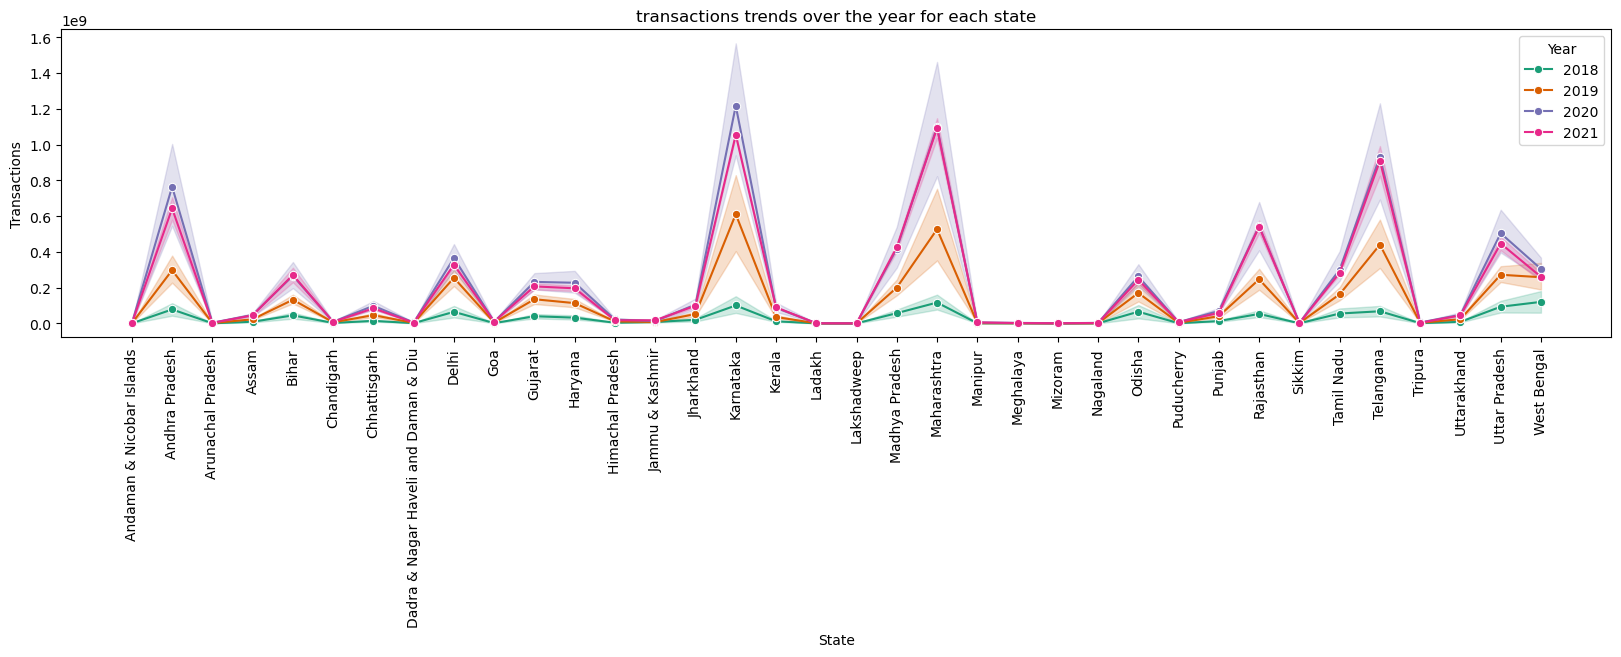

In [12]:
# plotting
plt.figure(figsize=(20,4))
sns.lineplot(x='State',y='Transactions',data=state_txn_users,hue='Year',palette='Dark2',marker='o',estimator=sum)
plt.xticks(rotation=90)
plt.title('transactions trends over the year for each state')

In [13]:
# 2. Identify the top 5 states with the highest transaction volumes and the top 5 states with the lowest transaction volumes. Display the results.

# Aggregating the total number of transactions by state
transactions_by_state = state_txn_users.groupby('State').agg(
    Transactions=('Transactions', 'sum')
).reset_index()

# Identifying the top 5 states with the highest transaction volumes
top_5_states_highest = transactions_by_state.nlargest(5, 'Transactions')
print("Top 5 states with the highest transaction volumes:")
print(top_5_states_highest)

# Identifying the top 5 states with the lowest transaction volumes
top_5_states_lowest = transactions_by_state.nsmallest(5, 'Transactions')
print("\nTop 5 states with the lowest transaction volumes:")
print(top_5_states_lowest)


Top 5 states with the highest transaction volumes:
             State  Transactions
15       Karnataka    2981044533
20     Maharashtra    2833670154
31       Telangana    2347430243
1   Andhra Pradesh    1781091169
28       Rajasthan    1382918930

Top 5 states with the lowest transaction volumes:
                        State  Transactions
18                Lakshadweep         71610
0   Andaman & Nicobar Islands       1223565
17                     Ladakh       1880109
23                    Mizoram       2162776
22                  Meghalaya       5648913


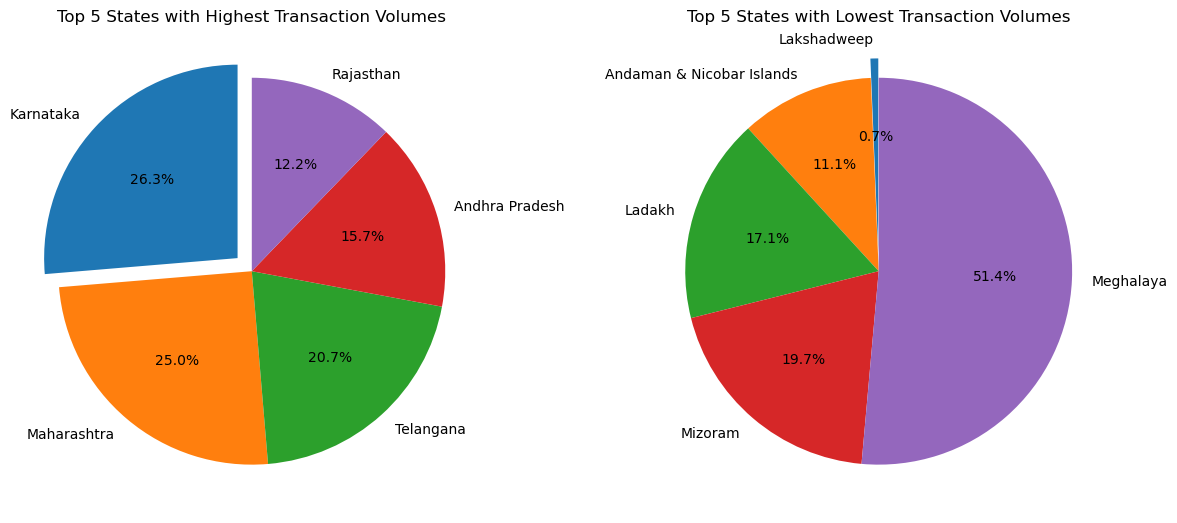

In [14]:
# Pie chart for the top 5 states with the highest transaction volumes
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
explode_highest = [0.1] + [0] * (len(top_5_states_highest) - 1)
plt.pie(top_5_states_highest['Transactions'], labels=top_5_states_highest['State'], autopct='%1.1f%%', explode=explode_highest, startangle=90)
plt.title('Top 5 States with Highest Transaction Volumes')

# Pie chart for the top 5 states with the lowest transaction volumes
plt.subplot(1, 2, 2)
explode_lowest = [0.1] + [0] * (len(top_5_states_lowest) - 1)
plt.pie(top_5_states_lowest['Transactions'], labels=top_5_states_lowest['State'], autopct='%1.1f%%', explode=explode_lowest, startangle=90)
plt.title('Top 5 States with Lowest Transaction Volumes')

# Display the pie charts
plt.tight_layout()
plt.show()


In [15]:
# 2.2: Identify the most common transaction types in each state and quarter

# 1. For each state and quarter, determine the most frequent transaction type. Display the results in a tabular format.

# Grouping by State and Quarter, then finding the most frequent transaction type
result = state_txn_split.groupby(['State', 'Quarter', 'Transaction Type']).agg(
    TransactionCount=('Transactions', 'sum')
).reset_index()

# Grouping by State and Quarter, then finding the index of the max transaction count for each group
index = result.groupby(['State', 'Quarter'])['TransactionCount'].idxmax()

# Using these indices to select the rows with the highest transaction counts
most_frequent_transactions = result.loc[index].reset_index(drop=True)
print("most frequent transaction type for each state and quater : ")
most_frequent_transactions


most frequent transaction type for each state and quater : 


,State,Quarter,Transaction Type,TransactionCount
0,Andaman & Nicobar Islands,1,Peer-to-peer payments,138772
1,Andaman & Nicobar Islands,2,Recharge & bill payments,180447
2,Andaman & Nicobar Islands,3,Recharge & bill payments,84165
3,Andaman & Nicobar Islands,4,Peer-to-peer payments,110018
4,Andhra Pradesh,1,Peer-to-peer payments,255236515
...,...,...,...,...
139,Uttarakhand,4,Peer-to-peer payments,11515030
140,West Bengal,1,Peer-to-peer payments,114083760
141,West Bengal,2,Peer-to-peer payments,118087640
142,West Bengal,3,Peer-to-peer payments,100961691


In [16]:
# 2.3: Determine the device brand with the highest number of registered users in each state

# 1. Identify the device brand with the highest number of registered users in each state. Display the results in a tabular format.

# Grouping by State and DeviceBrand to sum up the number of registered users for each combination
grouped_data = state_device_data.groupby(['State', 'Brand']).agg(
    TotalRegisteredUsers=('Registered Users', 'sum')
).reset_index()

# Finding the device brand with the highest number of registered users in each state
top_device_brands = grouped_data.loc[grouped_data.groupby('State')['TotalRegisteredUsers'].idxmax()].reset_index(drop=True)

# Displaying the results in a tabular format
top_device_brands


,State,Brand,TotalRegisteredUsers
0,Andaman & Nicobar Islands,Xiaomi,97889
1,Andhra Pradesh,Xiaomi,40061549
2,Arunachal Pradesh,Xiaomi,437803
3,Assam,Xiaomi,6979357
4,Bihar,Xiaomi,33721314
5,Chandigarh,Xiaomi,896628
6,Chhattisgarh,Xiaomi,8763373
7,Dadra & Nagar Haveli and Daman & Diu,Xiaomi,638834
8,Delhi,Xiaomi,24114984
9,Goa,Xiaomi,1208672


In [17]:
# 2.4: Create a list of the top district per state based on population

# 1. For each state, identify the district with the highest population. Display the results in a tabular format.

# Grouping by State and District to find the district with the highest population
top_districts = (district_demographics.loc[district_demographics.groupby('State')['Population'].idxmax()]).sort_values(by='Population', ascending=False).reset_index(drop=True)

# Displaying the results in a tabular format
print(top_districts[['State', 'District', 'Population']])

                                   State                District  Population
0                            West Bengal       North 24 Parganas    10082852
1                              Karnataka         Bangalore Urban     9588910
2                            Maharashtra                    Pune     9426959
3                                Gujarat               Ahmedabad     7208200
4                             Tamil Nadu                 Chennai     7139882
5                              Rajasthan                  Jaipur     6663971
6                          Uttar Pradesh               Allahabad     5959798
7                                  Bihar                   Patna     5772804
8                         Andhra Pradesh           East Godavari     5151549
9                                 Kerala              Malappuram     4110956
10                             Telangana               Hyderabad     3943323
11                                 Delhi        North West Delhi     3656539

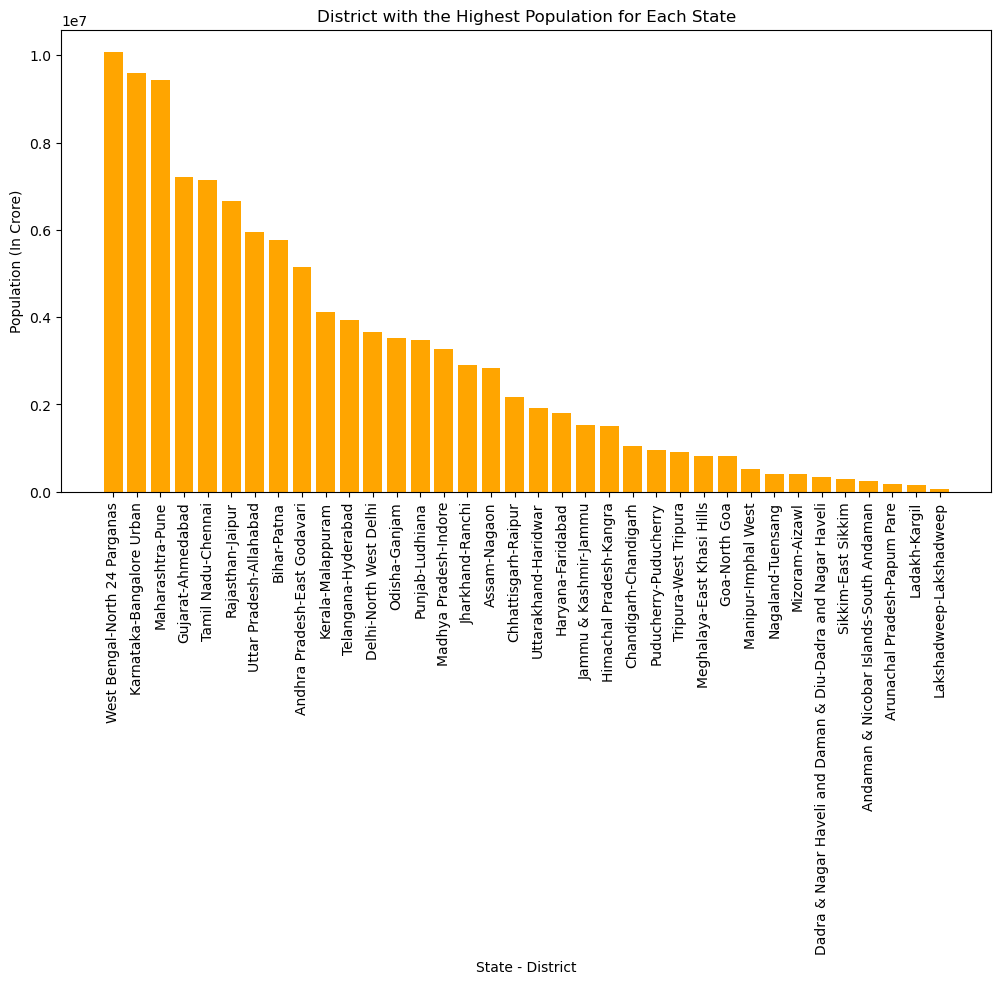

In [18]:
# 2. Create a column chart depicting the district with the highest population for each state.

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(top_districts['State'].astype(str) + '-' + top_districts['District'].astype(str), top_districts['Population'], color='orange')
plt.xlabel('State - District')
plt.ylabel('Population (In Crore)')
plt.title('District with the Highest Population for Each State')
plt.xticks(rotation=90)
plt.show()


In [19]:
# 2.5: Calculate the average transaction value (ATV) for each state

# 1. Compute the average transaction value for each state. Display the results in a tabular format.

# Calculate the total number of transactions and total transaction amount for each state
grouped_data = state_txn_users.groupby('State').agg(
    TotalTransactions=('Transactions', 'sum'),
    TotalTransactionAmount=('Amount (INR)', 'sum')
).reset_index()

# Compute the average transaction value (ATV) for each state
grouped_data['AverageTransactionValue'] = grouped_data['TotalTransactionAmount'] / grouped_data['TotalTransactions']
grouped_data_sorted = grouped_data.sort_values(by='AverageTransactionValue').reset_index()

# Display the results in a tabular format
print("Average Transaction Value (ATV) for each state:")
print(grouped_data_sorted[['State', 'AverageTransactionValue']])


Average Transaction Value (ATV) for each state:
                                   State  AverageTransactionValue
0                              Karnataka                    1,463
1   Dadra & Nagar Haveli and Daman & Diu                    1,497
2                            Maharashtra                    1,514
3                            West Bengal                    1,542
4                                  Delhi                    1,632
5                                 Odisha                    1,648
6                                 Kerala                    1,668
7                           Chhattisgarh                    1,718
8                            Uttarakhand                    1,734
9                         Madhya Pradesh                    1,741
10                               Tripura                    1,745
11                             Jharkhand                    1,782
12                               Gujarat                    1,803
13                          

In [20]:
# 2. Identify the top 5 states with the highest ATV and the top 5 states with the lowest ATV. Display the results.

# Identify the top 5 states with the highest ATV
top_5_highest_atv = grouped_data_sorted.nlargest(5, 'AverageTransactionValue')

print("\nTop 5 states with the highest ATV:")
print(top_5_highest_atv[['State', 'AverageTransactionValue']])

# Identify the top 5 states with the lowest ATV
top_5_lowest_atv = grouped_data_sorted.nsmallest(5, 'AverageTransactionValue')

print("\nTop 5 states with the lowest ATV:")
print(top_5_lowest_atv[['State', 'AverageTransactionValue']])


Top 5 states with the highest ATV:
                        State  AverageTransactionValue
35                     Ladakh                    3,514
34  Andaman & Nicobar Islands                    2,976
33                    Mizoram                    2,921
32                    Manipur                    2,906
31                   Nagaland                    2,794

Top 5 states with the lowest ATV:
                                  State  AverageTransactionValue
0                             Karnataka                    1,463
1  Dadra & Nagar Haveli and Daman & Diu                    1,497
2                           Maharashtra                    1,514
3                           West Bengal                    1,542
4                                 Delhi                    1,632


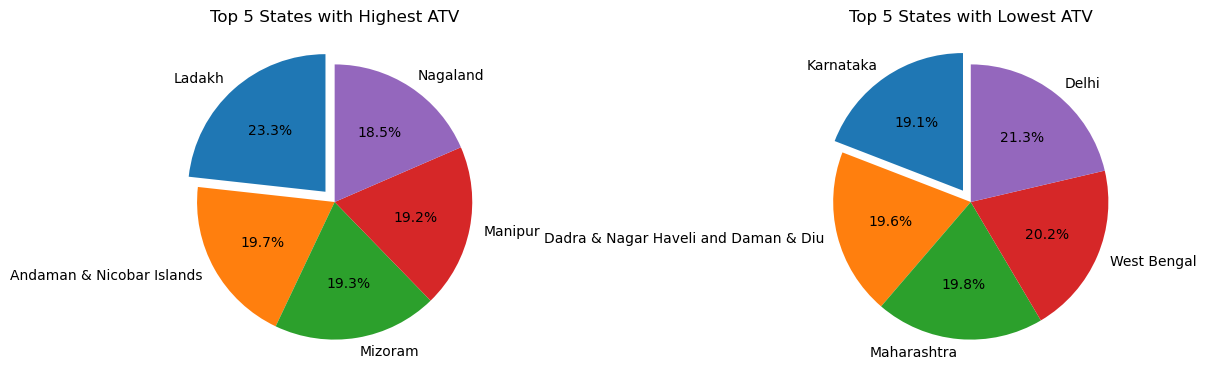

In [21]:
# Pie chart for the top 5 states with the highest ATV
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
explode_highest = [0.1] + [0] * (len(top_5_highest_atv) - 1)
plt.pie(top_5_highest_atv['AverageTransactionValue'], labels=top_5_highest_atv['State'], autopct='%1.1f%%', explode=explode_highest, startangle=90)
plt.title('Top 5 States with Highest ATV')

# Pie chart for the top 5 states with the lowest ATV
plt.subplot(1, 2, 2)
explode_lowest = [0.1] + [0] * (len(top_5_lowest_atv) - 1)
plt.pie(top_5_lowest_atv['AverageTransactionValue'], labels=top_5_lowest_atv['State'], autopct='%1.1f%%', explode=explode_lowest, startangle=90)
plt.title('Top 5 States with Lowest ATV')

# Display the pie charts
plt.tight_layout()
plt.show()


In [22]:
# 2.6: Analyze app usage trends

# 1. Calculate the total number of app opens over the years and quarters for each state. Display the results in a tabular format.

# Filtering out the data for 2018 Because at that time the feature for recording App opens was not introduced
filtered_data_not_2018 = state_txn_users[~(state_txn_users['Year'] == 2018)]

# Filtering out the data for 2019 Q1 Because at that time the feature for recording App opens was not introduced
filtered_data_not_2019_Q1 = filtered_data_not_2018[~((filtered_data_not_2018['Year']==2019) & (filtered_data_not_2018['Quarter'] == 1)) ]

# Grouping by State, Year, and Quarter to calculate the total number of app opens
app_opens_data = filtered_data_not_2019_Q1.groupby(['State', 'Year', 'Quarter']).agg(
    TotalAppOpens=('App Opens', 'sum')
).reset_index()

# Displaying the results in a tabular format
print("Total number of app opens over the years and quarters for each state:")
print(app_opens_data)


Total number of app opens over the years and quarters for each state:
                         State  Year  Quarter  TotalAppOpens
0    Andaman & Nicobar Islands  2019        2          52640
1    Andaman & Nicobar Islands  2019        3         171107
2    Andaman & Nicobar Islands  2019        4         177012
3    Andaman & Nicobar Islands  2020        1         193586
4    Andaman & Nicobar Islands  2020        2         305072
..                         ...   ...      ...            ...
319                West Bengal  2020        2      198589332
320                West Bengal  2020        3      246554831
321                West Bengal  2020        4      291721919
322                West Bengal  2021        1      316832674
323                West Bengal  2021        2      275341466

[324 rows x 4 columns]


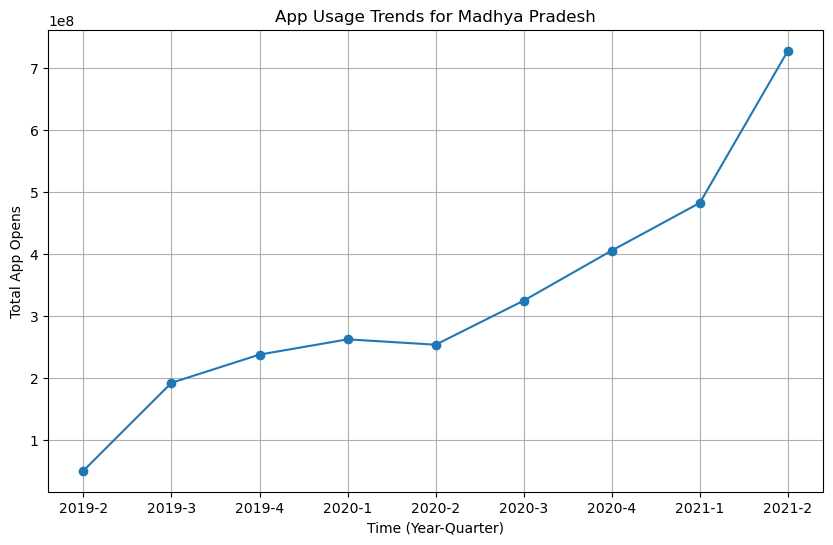

In [23]:
# 2. Identify trends in app usage by creating a line plot showing the number of app opens over time for a selected state.

# Selecting a specific state for the line plot (e.g., Madhya Pradesh)
selected_state = 'Madhya Pradesh'
state_data = app_opens_data[app_opens_data['State'] == selected_state]

# Creating a line plot showing the number of app opens over time for the selected state
plt.figure(figsize=(10, 6))
plt.plot(state_data['Year'].astype(str) + '-' + state_data['Quarter'].astype(str), state_data['TotalAppOpens'], marker='o', linestyle='-')
plt.xlabel('Time (Year-Quarter)')
plt.ylabel('Total App Opens')
plt.title(f'App Usage Trends for {selected_state}')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()


In [24]:
# 2.7: Distribution of transaction types

# 1. Create a bar chart showing the distribution of different transaction types for each state for the most recent quarter in the dataset.

# Finding the most recent Year in the dataset
most_recent_year = state_txn_split['Year'].max()

# Filtering data for the most recent Year
recent_year_data = state_txn_split[(state_txn_split['Year'] == most_recent_year)]

# Finding the most recent quarter in the dataset
most_recent_quarter = recent_year_data['Quarter'].max()

# Filtering data for the most recent quarter
recent_quarter_data = recent_year_data[(recent_year_data['Quarter'] == most_recent_quarter)]

# Grouping by State and TransactionType to sum the number of transactions
distribution_data = recent_quarter_data.groupby(['State', 'Transaction Type']).agg(
    TotalTransactions=('Transactions', 'sum') 
).reset_index()

# sort data
distribution_data = distribution_data.sort_values(by=['State', 'TotalTransactions'], ascending=[True, True])

print(f'Distribution of different transaction types for each state for the most recent Year {most_recent_year} Quarter {most_recent_quarter} :')
distribution_data.head(50)


Distribution of different transaction types for each state for the most recent Year 2021 Quarter 2 :


,State,Transaction Type,TotalTransactions
0,Andaman & Nicobar Islands,Financial Services,960
2,Andaman & Nicobar Islands,Others,1628
1,Andaman & Nicobar Islands,Merchant payments,85143
4,Andaman & Nicobar Islands,Recharge & bill payments,120911
3,Andaman & Nicobar Islands,Peer-to-peer payments,132772
5,Andhra Pradesh,Financial Services,243237
7,Andhra Pradesh,Others,406842
9,Andhra Pradesh,Recharge & bill payments,49626902
6,Andhra Pradesh,Merchant payments,112875274
8,Andhra Pradesh,Peer-to-peer payments,189614879


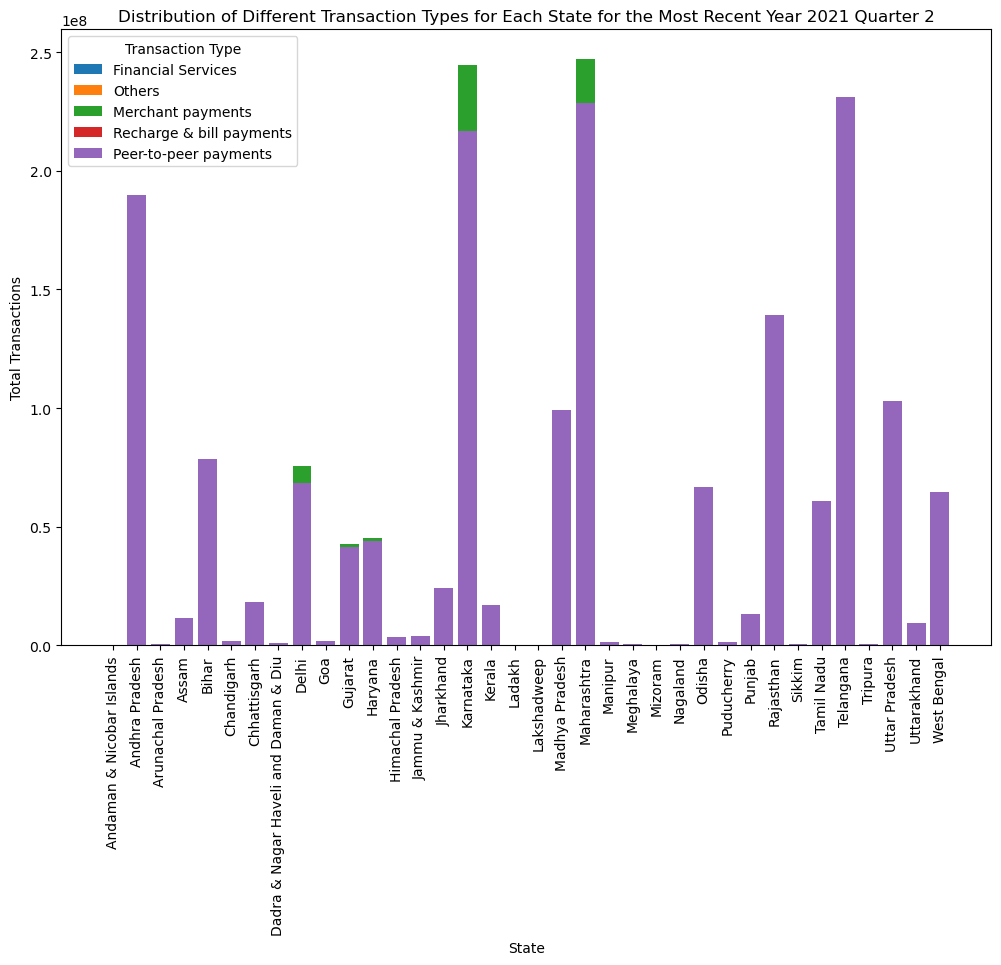

In [25]:
# Creating a bar chart

plt.figure(figsize=(12, 8))

for transaction_type in distribution_data['Transaction Type'].unique():
    type_data = distribution_data[distribution_data['Transaction Type'] == transaction_type]
    plt.bar(type_data['State'], type_data['TotalTransactions'], label=transaction_type)
    
plt.xlabel('State')
plt.ylabel('Total Transactions')
plt.title(f'Distribution of Different Transaction Types for Each State for the Most Recent Year {most_recent_year} Quarter {most_recent_quarter}')
plt.legend(title='Transaction Type')
plt.xticks(rotation=90)
plt.show()


In [26]:
# 2.8: Find unique mapping between district name and district code

# 1. Identify the unique mapping between district names and district codes from the dataset. [hint: you can use drop_duplicates()].

# Selecting only the necessary columns (DistrictName and DistrictCode)
selected_columns = district_demographics[['District', 'Code']]

# Dropping duplicates to find unique mappings between district names and district codes
unique_districts = selected_columns.drop_duplicates()

# Displaying the unique mappings
print("Unique mappings between district names and district codes:")
print(unique_districts)

# 2. Create a CSV file containing the unique district name and district code mappings.

# Creating a CSV file containing the unique district name and district code mappings
unique_districts.to_csv('unique_district_mappings.csv', index=False)

# 3. Export the CSV file.


Unique mappings between district names and district codes:
          District  Code
0        Anantapur  AP01
1         Chittoor  AP02
2    East Godavari  AP03
3           Guntur  AP04
4              YSR  AP13
..             ...   ...
737     West Delhi  DL11
738       Karaikal  PY01
739           Mahé  PY02
740     Puducherry  PY03
741          Yanam  PY04

[742 rows x 2 columns]


In [27]:
# Task 3: Data Quality Checks
# 3.1: Ensure data consistency across state and district levels

# 1. For each state, calculate the total number of transactions, total transaction amount,and total registered users by summing up the values from the district-level data.

# Grouping by State to calculate the total number of transactions, total transaction amount, and total registered users
district_totals = district_txn_users.groupby('State').agg(
    TotalTransactions=('Transactions', 'sum'),
    TotalTransactionAmount=('Amount (INR)', 'sum'),
    TotalRegisteredUsers=('Registered Users', 'sum')
).reset_index()

# Displaying the results in a tabular format
print("Total number of transactions, total transaction amount, and total registered users for each state:")
district_totals


Total number of transactions, total transaction amount, and total registered users for each state:


,State,TotalTransactions,TotalTransactionAmount,TotalRegisteredUsers
0,Andaman & Nicobar Islands,1223565,"3,641,817,861",408396
1,Andhra Pradesh,1781091169,"3,860,292,139,028",158007957
2,Arunachal Pradesh,8043799,"22,251,830,957",1862214
3,Assam,123577981,"281,408,712,657",26860751
4,Bihar,713643889,"1,639,578,926,752",115284760
5,Chandigarh,25516542,"53,712,084,631",3801466
6,Chhattisgarh,241908549,"415,635,319,208",37448388
7,Dadra & Nagar Haveli and Daman & Diu,12462185,"18,658,784,568",2701112
8,Delhi,1011031124,"1,649,942,211,116",95374654
9,Goa,24481604,"44,271,871,113",4755320


In [28]:
# 2. Compare the results with the corresponding values at the state level to ensure they match.

# Grouping by State to calculate the total number of transactions, total transaction amount, and total registered users
state_totals = state_txn_users.groupby('State').agg(
    TotalTransactions=('Transactions', 'sum'),
    TotalTransactionAmount=('Amount (INR)', 'sum'),
    TotalRegisteredUsers=('Registered Users', 'sum')
).reset_index()

# Merging the district-level totals with the state-level totals
comparison_data = district_totals.merge(state_totals, on='State', suffixes=('_District', '_State'))

# Checking for discrepancies
comparison_data['TransactionsMatch'] = comparison_data['TotalTransactions_District'] == comparison_data['TotalTransactions_State']
comparison_data['TransactionAmountMatch'] = comparison_data['TotalTransactionAmount_District'] == comparison_data['TotalTransactionAmount_State']
comparison_data['RegisteredUsersMatch'] = comparison_data['TotalRegisteredUsers_District'] == comparison_data['TotalRegisteredUsers_State']

# Displaying the comparison results
print("Comparison of district-level totals with state-level data:")
comparison_data



Comparison of district-level totals with state-level data:


,State,TotalTransactions_District,TotalTransactionAmount_District,TotalRegisteredUsers_District,TotalTransactions_State,TotalTransactionAmount_State,TotalRegisteredUsers_State,TransactionsMatch,TransactionAmountMatch,RegisteredUsersMatch
0,Andaman & Nicobar Islands,1223565,"3,641,817,861",408396,1223565,"3,641,817,861",408396,True,False,True
1,Andhra Pradesh,1781091169,"3,860,292,139,028",158007957,1781091169,"3,860,292,139,028",158007957,True,False,True
2,Arunachal Pradesh,8043799,"22,251,830,957",1862214,8043799,"22,251,830,957",1862214,True,False,True
3,Assam,123577981,"281,408,712,657",26860751,123577981,"281,408,712,657",26860751,True,False,True
4,Bihar,713643889,"1,639,578,926,752",115284760,713643889,"1,639,578,926,752",115284760,True,False,True
5,Chandigarh,25516542,"53,712,084,631",3801466,25516542,"53,712,084,631",3801466,True,False,True
6,Chhattisgarh,241908549,"415,635,319,208",37448388,241908549,"415,635,319,208",37448388,True,False,True
7,Dadra & Nagar Haveli and Daman & Diu,12462185,"18,658,784,568",2701112,12462185,"18,658,784,568",2701112,True,False,True
8,Delhi,1011031124,"1,649,942,211,116",95374654,1011031124,"1,649,942,211,116",95374654,True,False,True
9,Goa,24481604,"44,271,871,113",4755320,24481604,"44,271,871,113",4755320,True,False,True


In [29]:
# 3. Display any discrepancies found between the district-level and state-level data.

# Displaying any discrepancies found between the district-level and state-level data
discrepancies = comparison_data[
    (comparison_data['TransactionsMatch'] == False) |
    (comparison_data['TransactionAmountMatch'] == False) |
    (comparison_data['RegisteredUsersMatch'] == False)
]

print("Discrepancies found between district-level and state-level data:")
discrepancies


Discrepancies found between district-level and state-level data:


,State,TotalTransactions_District,TotalTransactionAmount_District,TotalRegisteredUsers_District,TotalTransactions_State,TotalTransactionAmount_State,TotalRegisteredUsers_State,TransactionsMatch,TransactionAmountMatch,RegisteredUsersMatch
0,Andaman & Nicobar Islands,1223565,"3,641,817,861",408396,1223565,"3,641,817,861",408396,True,False,True
1,Andhra Pradesh,1781091169,"3,860,292,139,028",158007957,1781091169,"3,860,292,139,028",158007957,True,False,True
2,Arunachal Pradesh,8043799,"22,251,830,957",1862214,8043799,"22,251,830,957",1862214,True,False,True
3,Assam,123577981,"281,408,712,657",26860751,123577981,"281,408,712,657",26860751,True,False,True
4,Bihar,713643889,"1,639,578,926,752",115284760,713643889,"1,639,578,926,752",115284760,True,False,True
5,Chandigarh,25516542,"53,712,084,631",3801466,25516542,"53,712,084,631",3801466,True,False,True
6,Chhattisgarh,241908549,"415,635,319,208",37448388,241908549,"415,635,319,208",37448388,True,False,True
7,Dadra & Nagar Haveli and Daman & Diu,12462185,"18,658,784,568",2701112,12462185,"18,658,784,568",2701112,True,False,True
8,Delhi,1011031124,"1,649,942,211,116",95374654,1011031124,"1,649,942,211,116",95374654,True,False,True
9,Goa,24481604,"44,271,871,113",4755320,24481604,"44,271,871,113",4755320,True,False,True


In [30]:
#Task 4: Data Merging and Advanced Analysis

# 4.1: Ratio of users to population by state

# 1. Merge the State_Txn and Users dataset with the District Demographics dataset to calculate the ratio of registered users to the population for each state. Display the results in a tabular format.

merged_data = pd.merge(state_txn_users, district_demographics, on='State')

# Grouping by state and displaying the results with floating point ratio
grouped_data = merged_data.groupby('State').agg({
    'Registered Users': 'sum',
    'Population': 'sum',
})

grouped_data['Users_to_Population_Ratio'] = (grouped_data['Registered Users'] / grouped_data['Population'])

# Ensuring the floating point format for display 
pd.options.display.float_format = '{:.2f}'.format

# Sorting by Users_to_Population_Ratio 
grouped_data = (grouped_data.sort_values(by='Users_to_Population_Ratio', ascending=True)).reset_index()

# Displaying the results in a tabular format
print("Ratio of registered users to population for each state:")
grouped_data[['State', 'Registered Users', 'Population','Users_to_Population_Ratio']]


Ratio of registered users to population for each state:


,State,Registered Users,Population,Users_to_Population_Ratio
0,Lakshadweep,34223,902622,0.04
1,Andaman & Nicobar Islands,1225188,5328134,0.23
2,Chandigarh,3801466,14776300,0.26
3,Ladakh,1159650,3876250,0.30
4,Meghalaya,15801192,47108810,0.34
5,Mizoram,6661732,15274196,0.44
6,Goa,9510640,20408122,0.47
7,Nagaland,17284644,32692450,0.53
8,Tripura,29292600,51394448,0.57
9,Sikkim,5116796,8507632,0.60


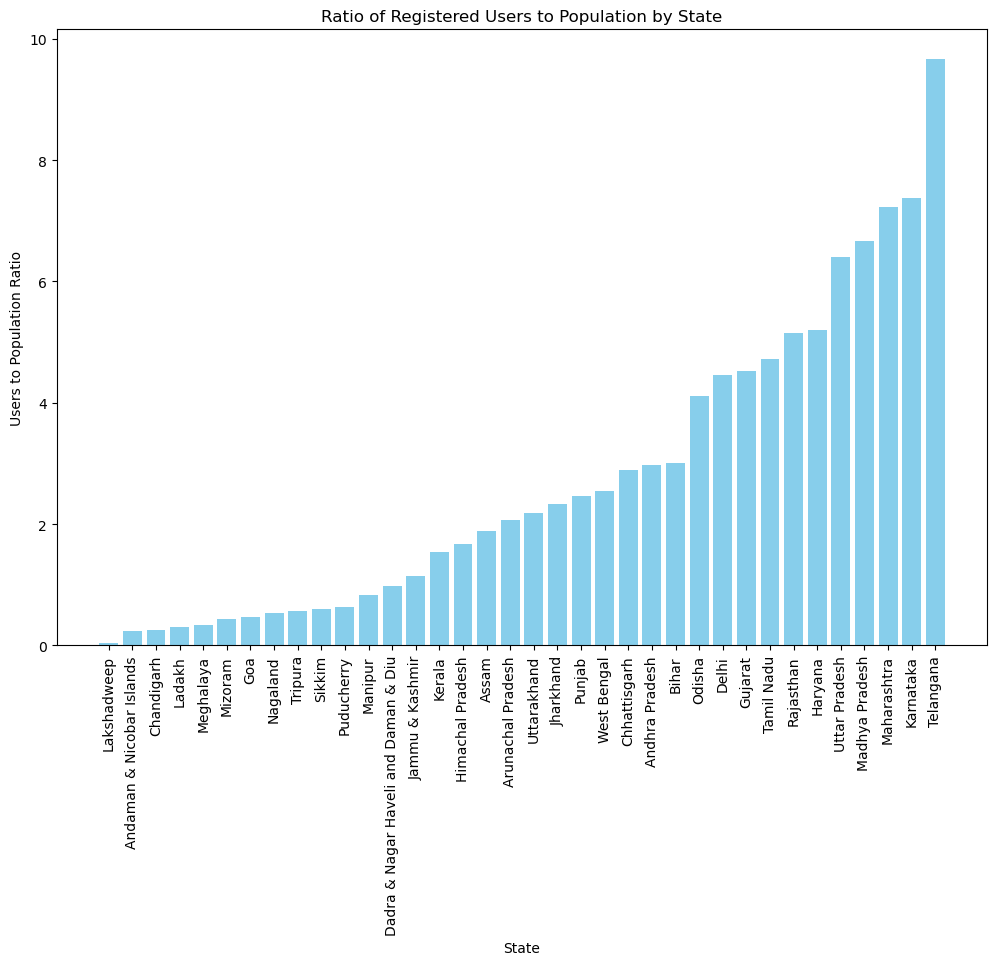

In [31]:
# 2. Create a column chart depicting the ratio of users to population by state.

# Create a column chart depicting the ratio of users to population by state
plt.figure(figsize=(12, 8))
plt.bar(grouped_data['State'], grouped_data['Users_to_Population_Ratio'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Users to Population Ratio')
plt.title('Ratio of Registered Users to Population by State')
plt.xticks(rotation=90)
plt.show()


In [32]:
# 4.2: Correlate population density with transaction volume

# 1. Merge the District_Txn and Users dataset with the District Demographics dataset.

merged_data2 = pd.merge(district_txn_users, district_demographics, on='State')
merged_data2


,State,Year,Quarter,District_x,Code_x,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens,District_y,Headquarters,Population,Area (sq km),Density,Code_y,Alternate Name
0,Andaman & Nicobar Islands,2018,1,Nicobars,AN01,528,1139848.80,2158.80,262,0,Nicobar,Car Nicobar,36842,1841.00,20,AN01,Nicobars
1,Andaman & Nicobar Islands,2018,1,Nicobars,AN01,528,1139848.80,2158.80,262,0,North and Middle Andaman,Mayabunder,105597,3736.00,28,AN02,North and Middle Andaman
2,Andaman & Nicobar Islands,2018,1,Nicobars,AN01,528,1139848.80,2158.80,262,0,South Andaman,Port Blair,238142,2672.00,89,AN03,South Andaman
3,Andaman & Nicobar Islands,2018,1,North And Middle Andaman,AN02,442,931663.08,2107.84,632,0,Nicobar,Car Nicobar,36842,1841.00,20,AN01,Nicobars
4,Andaman & Nicobar Islands,2018,1,North And Middle Andaman,AN02,442,931663.08,2107.84,632,0,North and Middle Andaman,Mayabunder,105597,3736.00,28,AN02,North and Middle Andaman
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339999,West Bengal,2021,2,Uttar Dinajpur,WB23,2253385,5564220751.05,2469.27,392388,8184990,Paschim Medinipur,Midnapore,4776909,6308.00,757,WB18,Paschim Medinipur
340000,West Bengal,2021,2,Uttar Dinajpur,WB23,2253385,5564220751.05,2469.27,392388,8184990,Purba Medinipur,Tamluk,5095875,4736.00,1076,WB20,Purba Medinipur
340001,West Bengal,2021,2,Uttar Dinajpur,WB23,2253385,5564220751.05,2469.27,392388,8184990,Purulia,Purulia,2927965,6259.00,468,WB21,Purulia
340002,West Bengal,2021,2,Uttar Dinajpur,WB23,2253385,5564220751.05,2469.27,392388,8184990,South 24 Parganas,Alipore,8161961,9960.00,819,WB22,South Twenty Four Parganas


In [33]:
# 2. Calculate the correlation between population density and transaction volume.

# Calculating the correlation between population density and transaction volume
correlation = merged_data[['Density','Transactions','Population']].corr()

# Displaying the correlation result
print("Correlation between population density and transaction volume:")
correlation

Correlation between population density and transaction volume:


,Density,Transactions,Population
Density,1.00,0.04,0.22
Transactions,0.04,1.00,0.24
Population,0.22,0.24,1.00


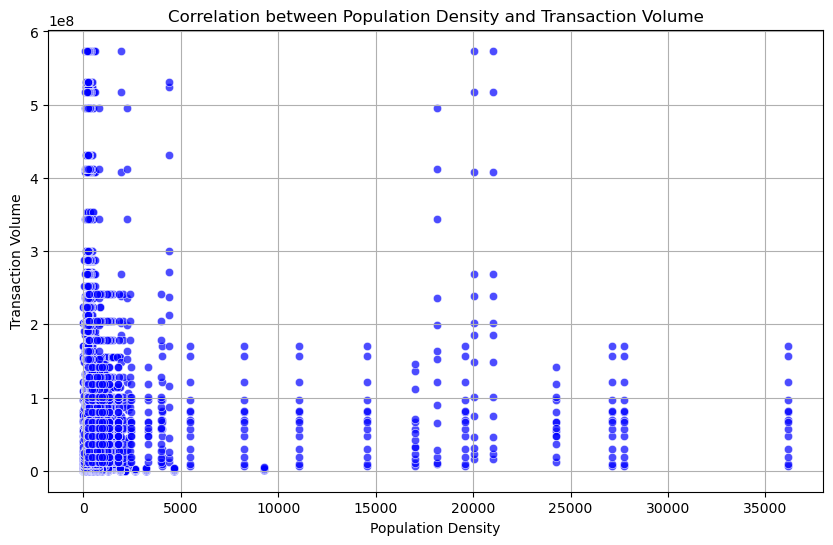

In [34]:
# 3. Create a scatter plot to visualize the correlation between population density and transaction volume.

# Creating a scatter plot to visualize the correlation between population density and transaction volume
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Density'], merged_data['Transactions'], alpha=0.7, color='b', edgecolors='w', linewidth=0.5)

# Adding titles and labels
plt.xlabel('Population Density')
plt.ylabel('Transaction Volume')
plt.title('Correlation between Population Density and Transaction Volume')

# Adding a grid and showing the plot
plt.grid(True)
plt.show()

In [35]:
# 4.3: Average transaction amount per user

# 1. Merge relevant datasets to calculate the average transaction amount per user for each state. Display the results in a tabular format.

# Calculating the average transaction amount per user for each state
#state_txn_users['Avg_Transaction_Amount_Per_User'] = state_txn_users['Amount (INR)'] / state_txn_users['Registered Users']

state_grouped = state_txn_users.groupby('State').agg( TotalTransactionAmount=('Amount (INR)', 'sum'), 
                                                     TotalRegisteredUsers=('Registered Users', 'sum') 
                                                    ).reset_index() 

# Calculating the average transaction amount per user for each state 
state_grouped['Avg_Transaction_Amount_Per_User'] = state_grouped['TotalTransactionAmount'] / state_grouped['TotalRegisteredUsers']

# Displaying the results in a tabular format
print("Average transaction amount per user for each state:")
state_grouped[['State','TotalTransactionAmount','TotalRegisteredUsers', 'Avg_Transaction_Amount_Per_User']].sort_values(by='Avg_Transaction_Amount_Per_User', ascending=True).reset_index()


Average transaction amount per user for each state:


,index,State,TotalTransactionAmount,TotalRegisteredUsers,Avg_Transaction_Amount_Per_User
0,18,Lakshadweep,192158684.67,34223,5614.90
1,32,Tripura,20970514761.53,3661575,5727.18
2,7,Dadra & Nagar Haveli and Daman & Diu,18658784568.34,2701112,6907.82
3,16,Kerala,372959870819.69,51267042,7274.85
4,12,Himachal Pradesh,97865455329.56,13373980,7317.60
5,27,Punjab,394177285102.20,45811761,8604.28
6,22,Meghalaya,12541621895.08,1436472,8730.85
7,10,Gujarat,1105328681946.77,126380032,8746.07
8,0,Andaman & Nicobar Islands,3641817860.75,408396,8917.37
9,34,Uttarakhand,215071471849.20,23792747,9039.37


In [36]:
# 2. Identify the top 5 states with the highest average transaction amount per user and the top 5 states with the lowest average transaction amount per user. Display the results.

# Identifying the top 5 states with the highest average transaction amount per user
top_5_highest = state_grouped.nlargest(5, 'Avg_Transaction_Amount_Per_User')

# Identifying the top 5 states with the lowest average transaction amount per user
top_5_lowest = state_grouped.nsmallest(5, 'Avg_Transaction_Amount_Per_User')

# Displaying the results
print("Top 5 states with the highest average transaction amount per user:")
print(top_5_highest[['State', 'Avg_Transaction_Amount_Per_User']])

print("\nTop 5 states with the lowest average transaction amount per user:")
print(top_5_lowest[['State', 'Avg_Transaction_Amount_Per_User']])



Top 5 states with the highest average transaction amount per user:
             State  Avg_Transaction_Amount_Per_User
31       Telangana                         30653.51
1   Andhra Pradesh                         24431.00
15       Karnataka                         21474.28
28       Rajasthan                         17530.77
8            Delhi                         17299.59

Top 5 states with the lowest average transaction amount per user:
                                   State  Avg_Transaction_Amount_Per_User
18                           Lakshadweep                          5614.90
32                               Tripura                          5727.18
7   Dadra & Nagar Haveli and Daman & Diu                          6907.82
16                                Kerala                          7274.85
12                      Himachal Pradesh                          7317.60


In [37]:
# 4.4: Device brand usage ratio

# 1. Merge the State_Device_Data dataset with the State_Txn and Users dataset.

State_dev = state_device_data.groupby(['State','Brand']).agg({'Registered Users': 'sum'}).reset_index()
#State_dev.head(20)

state_txn_users_dev = state_txn_users.groupby(['State']).agg({'Registered Users': 'sum'}).reset_index()
#state_txn_users_dev.head(20)

state_device_data_merge=State_dev.merge(state_txn_users_dev[['State','Registered Users']],on=['State'],suffixes=('_Device', '_Txn'))
state_device_data_merge.head(15)


,State,Brand,Registered Users_Device,Registered Users_Txn
0,Andaman & Nicobar Islands,Apple,9334,408396
1,Andaman & Nicobar Islands,Huawei,11497,408396
2,Andaman & Nicobar Islands,Lenovo,5362,408396
3,Andaman & Nicobar Islands,Motorola,9491,408396
4,Andaman & Nicobar Islands,OnePlus,15397,408396
5,Andaman & Nicobar Islands,Oppo,36007,408396
6,Andaman & Nicobar Islands,Others,33630,408396
7,Andaman & Nicobar Islands,Realme,22546,408396
8,Andaman & Nicobar Islands,Samsung,77065,408396
9,Andaman & Nicobar Islands,Tecno,1770,408396


In [38]:
# 2. Calculate the ratio of users using each device brand to the total number of registered users in each state. Display the results in a tabular format.

# Calculating the ratio of users using each device brand to the total number of registered users in each state

state_device_data_merge['ratio_registered_user']=state_device_data_merge['Registered Users_Device']/state_device_data_merge['Registered Users_Txn']
state_device_data_merge.head(15)



,State,Brand,Registered Users_Device,Registered Users_Txn,ratio_registered_user
0,Andaman & Nicobar Islands,Apple,9334,408396,0.02
1,Andaman & Nicobar Islands,Huawei,11497,408396,0.03
2,Andaman & Nicobar Islands,Lenovo,5362,408396,0.01
3,Andaman & Nicobar Islands,Motorola,9491,408396,0.02
4,Andaman & Nicobar Islands,OnePlus,15397,408396,0.04
5,Andaman & Nicobar Islands,Oppo,36007,408396,0.09
6,Andaman & Nicobar Islands,Others,33630,408396,0.08
7,Andaman & Nicobar Islands,Realme,22546,408396,0.06
8,Andaman & Nicobar Islands,Samsung,77065,408396,0.19
9,Andaman & Nicobar Islands,Tecno,1770,408396,0.00


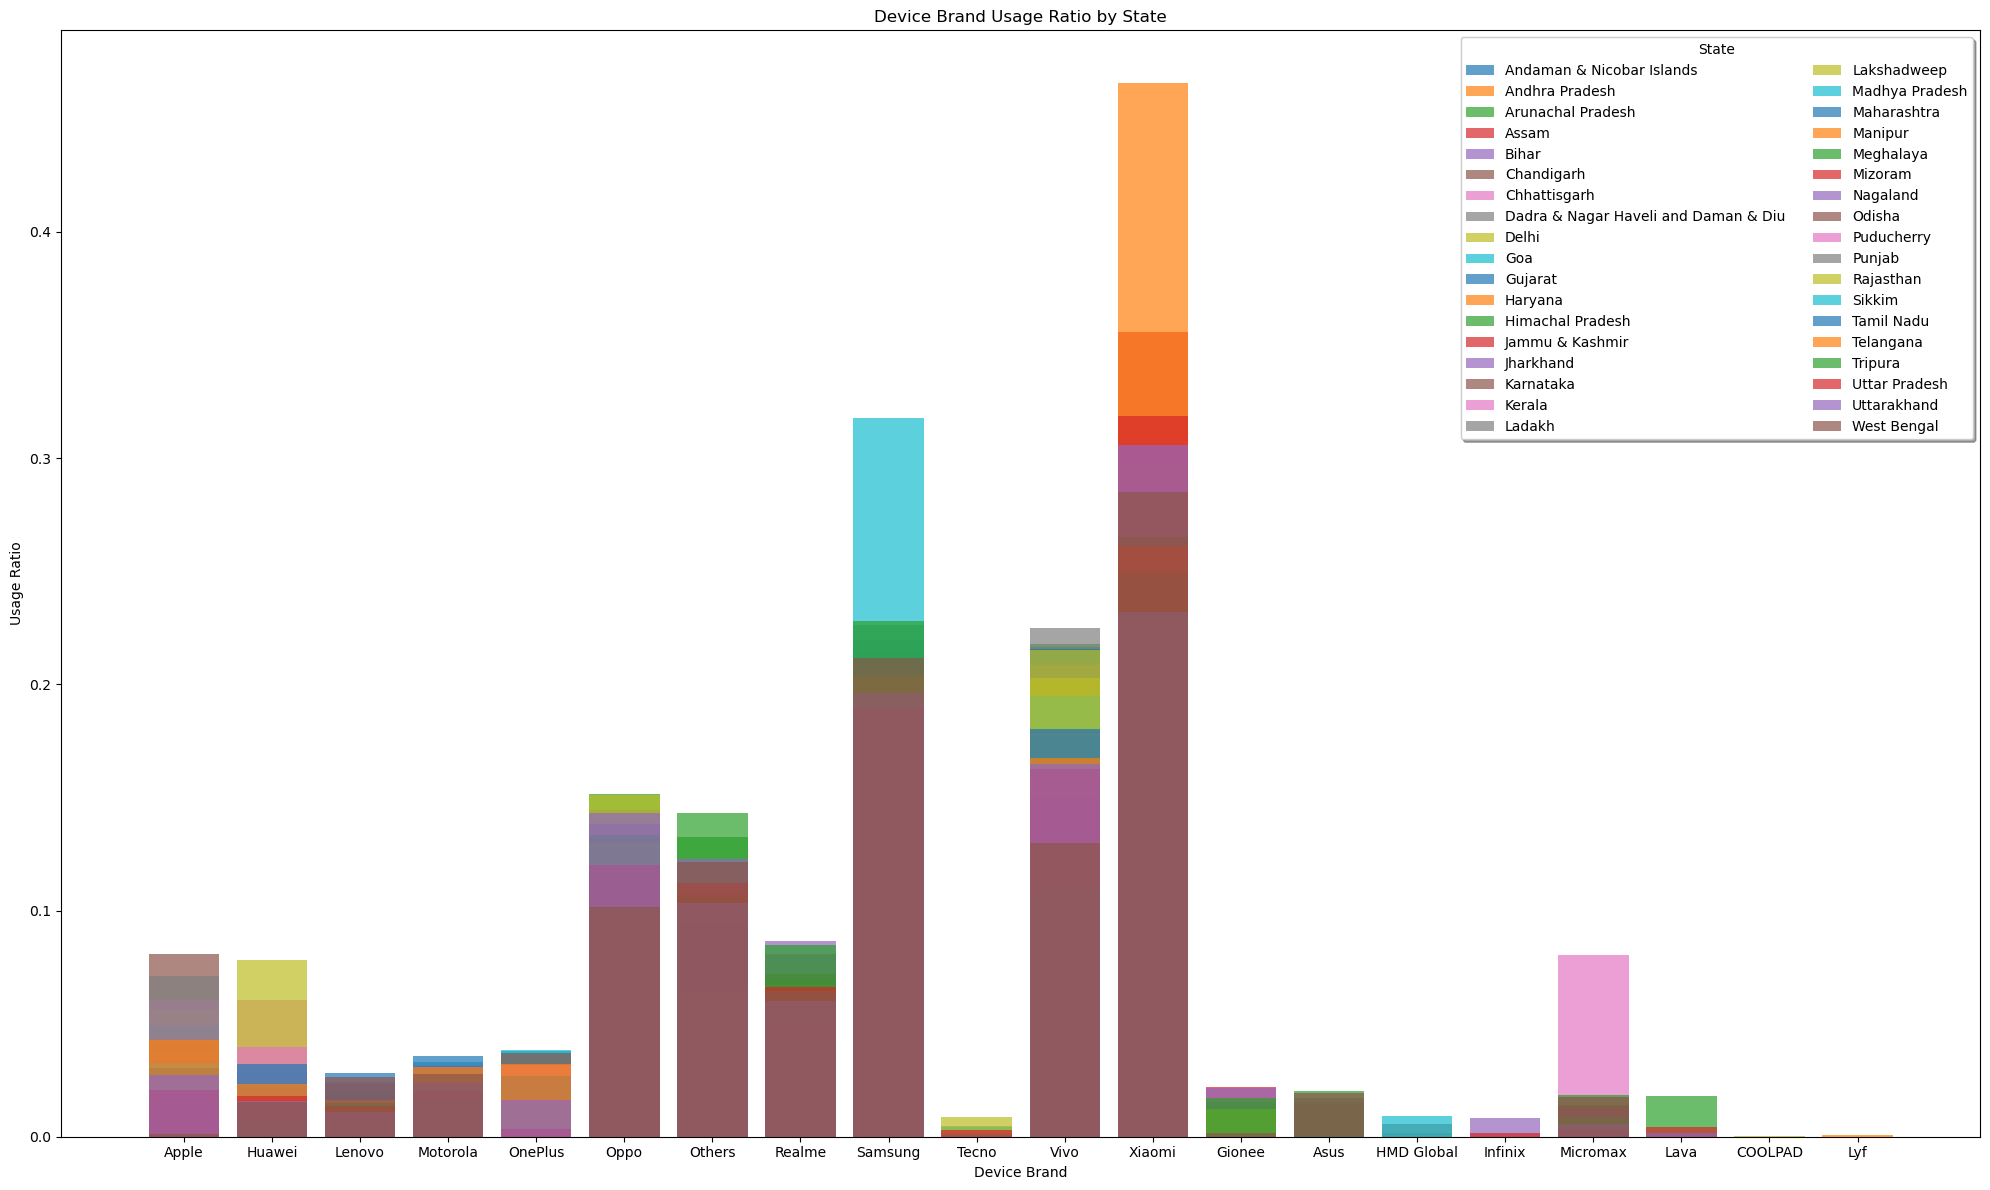

In [39]:
# 3. Create a bar chart depicting the device brand usage ratio for each state.

# Creating a bar chart to depict the device brand usage ratio for each state

# Set the figure size
plt.figure(figsize=(20, 12))

# Plot bar chart
for state in state_device_data_merge['State'].unique():
    state_data = state_device_data_merge[state_device_data_merge['State'] == state]
    plt.bar(state_data['Brand'], state_data['ratio_registered_user'], label=state, alpha=0.7)

# Adding titles and labels
plt.xlabel('Device Brand')
plt.ylabel('Usage Ratio')
plt.title('Device Brand Usage Ratio by State')
plt.legend(title='State',bbox_to_anchor=(1, 1),ncol=2,fancybox=True, shadow=True)
plt.xticks(rotation=0)
plt.tight_layout()

# Display the bar chart
plt.show()

    Year  Quarter  TotalTransactions
0   2018        1            8025395
1   2018        2           10561412
2   2018        3           17126985
3   2018        4           21397555
4   2019        1           37301049
5   2019        2           40846013
6   2019        3           53610411
7   2019        4           68131989
8   2020        1           79366746
9   2020        2           76340573
10  2020        3          108579881
11  2020        4          153652541
12  2021        1          201998498
13  2021        2          223314680


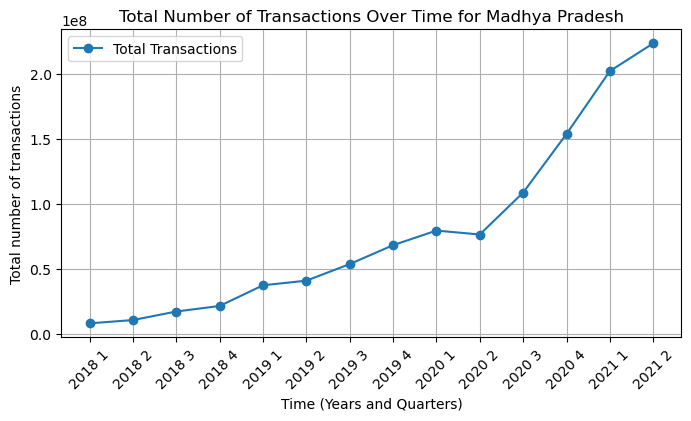

    Year  Quarter  TotalTransactionAmount
0   2018        1           8681603403.45
1   2018        2          15924081066.68
2   2018        3          24149742204.67
3   2018        4          33905608072.97
4   2019        1          48070279522.05
5   2019        2          68334566380.56
6   2019        3          77676321491.24
7   2019        4         104687926790.86
8   2020        1         126737281436.19
9   2020        2         147922015289.06
10  2020        3         205701679984.54
11  2020        4         284275139772.37
12  2021        1         343533954382.29
13  2021        2         425500768035.62


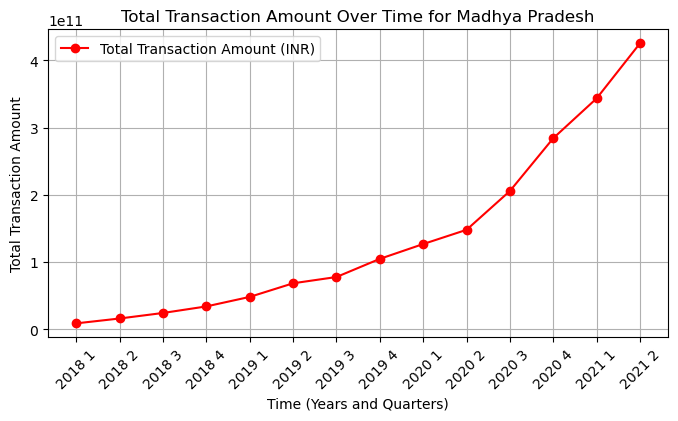

In [40]:
# Task 5: Data Visualization 
# 5.1: Plot the total transactions and amount over time for a selected state

# 1. Create a line plot showing the total number of transactions and the total transaction amount over time (years and quarters) for a selected state.
#[Hint: you can select any state, maybe your home state or state with max transactions]

# Select the state with the maximum transactions
#selected_state = state_txn_users.groupby('State')['Transactions'].sum().idxmax()

# Selected State
selected_state = 'Madhya Pradesh'

# Filter the data for the selected state
state_data = state_txn_users[state_txn_users['State'] == selected_state]

# Group by year and quarter to calculate the total Transactions count
state_grouped_transactions = state_data.groupby(['Year', 'Quarter']).agg(
    TotalTransactions=('Transactions', 'sum')
).reset_index()
print(state_grouped_transactions)


# line chart for Total Transactions Over Time for Karnataka
plt.figure(figsize=(8, 4))
plt.plot(state_grouped_transactions['Year'].astype(str) + ' ' + state_grouped_transactions['Quarter'].astype(str), state_grouped_transactions['TotalTransactions'], marker='o', label='Total Transactions')
plt.xlabel('Time (Years and Quarters)')
plt.ylabel('Total number of transactions')
plt.title(f'Total Number of Transactions Over Time for {selected_state}')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# Group by year and quarter to calculate the total Transactions amount
state_grouped_transactions_amount= state_data.groupby(['Year', 'Quarter']).agg(
    TotalTransactionAmount=('Amount (INR)', 'sum')
).reset_index()
print(state_grouped_transactions_amount)

# line chart for Total Transaction Amount Over Time for Karnataka
plt.figure(figsize=(8,4))
plt.plot(state_grouped_transactions_amount['Year'].astype(str) + ' ' + state_grouped_transactions_amount['Quarter'].astype(str), state_grouped_transactions_amount['TotalTransactionAmount'], marker='o', label='Total Transaction Amount (INR)' ,color='red')
plt.xlabel('Time (Years and Quarters)')
plt.ylabel('Total Transaction Amount')
plt.title(f'Total Transaction Amount Over Time for {selected_state}')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


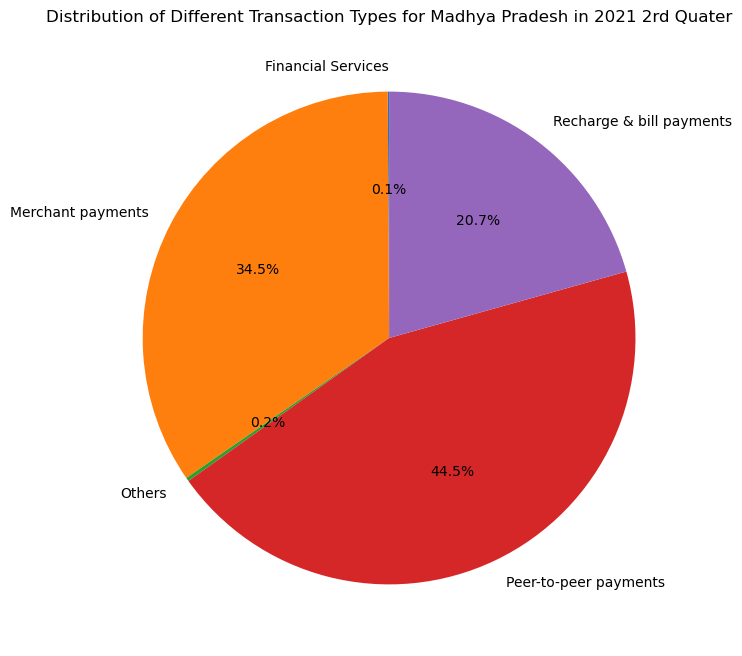

In [41]:
# 5.2: Create a pie chart showing the distribution of transaction types for a specific quarter

# 1. Create a pie chart showing the distribution of different transaction types for a selected state and quarter.

# Select the state and quarter
selected_state = 'Madhya Pradesh'
selected_quarter = 2
selected_year = 2021

# Filter the data for the selected state and quarter
filtered_data = state_txn_split[(state_txn_split['State'] == selected_state) & (state_txn_split['Year'] == selected_year) & (state_txn_split['Quarter'] == selected_quarter) ]

# Calculate the distribution of different transaction types
transaction_distribution = filtered_data.groupby('Transaction Type').agg(
    TotalTransactions=('Transactions', 'sum')
).reset_index()

# Create the pie chart
plt.figure(figsize=(10, 8))
plt.pie(transaction_distribution['TotalTransactions'], labels=transaction_distribution['Transaction Type'], autopct='%1.1f%%', startangle=90)
plt.title(f'Distribution of Different Transaction Types for {selected_state} in {selected_year} {selected_quarter}rd Quater')
plt.show()



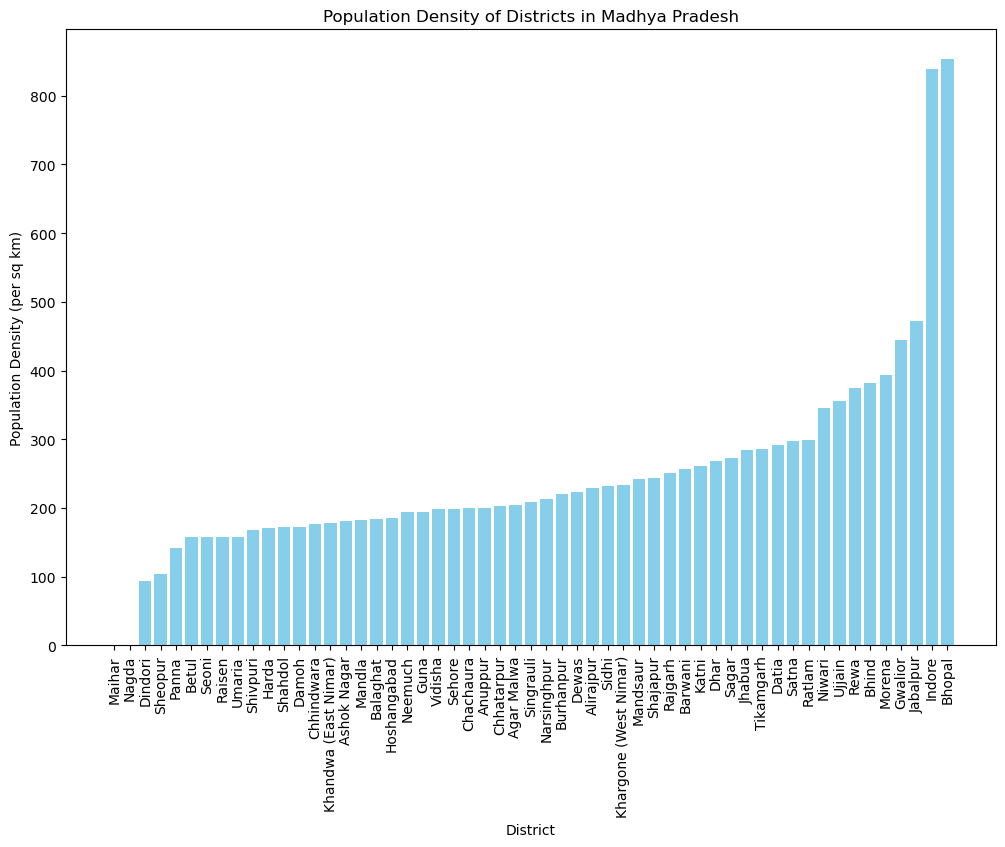

In [42]:
# 5.3: Visualize the population density of districts in a selected state

# 1. Create a bar plot showing the population density of districts in a selected state.

# Select the state for which you want to show the population density
selected_state = 'Madhya Pradesh'

# Filter the data for the selected state
state_data = (district_demographics[district_demographics['State'] == selected_state]).sort_values(by='Density', ascending=True).reset_index()

# Create the bar plot
plt.figure(figsize=(12, 8))
plt.bar(state_data['District'], state_data['Density'], color='skyblue')
plt.xlabel('District')
plt.ylabel('Population Density (per sq km)')
plt.title(f'Population Density of Districts in {selected_state}')
plt.xticks(rotation=90)
plt.show()


In [43]:
# Task 6: Insights and Conclusions [Advanced Section]
# 6.1: Identify any trends or patterns in the transaction data

# 1. Analyze the transaction data to identify any noticeable trends or patterns. Summarize your findings.
# [Hint: you can create line graph – at year or quarter and discuss your findings with interviewer]

# analysing yearly trends of transactions volume for all the state.

# Grouping data by State and Year and summing Transactions
grouped_data = state_txn_users.groupby(['State', 'Year'])['Transactions'].sum().reset_index()
grouped_data.head(15)


,State,Year,Transactions
0,Andaman & Nicobar Islands,2018,58021
1,Andaman & Nicobar Islands,2019,133104
2,Andaman & Nicobar Islands,2020,446274
3,Andaman & Nicobar Islands,2021,586166
4,Andhra Pradesh,2018,77779112
5,Andhra Pradesh,2019,297180254
6,Andhra Pradesh,2020,763616699
7,Andhra Pradesh,2021,642515104
8,Arunachal Pradesh,2018,435229
9,Arunachal Pradesh,2019,1314871


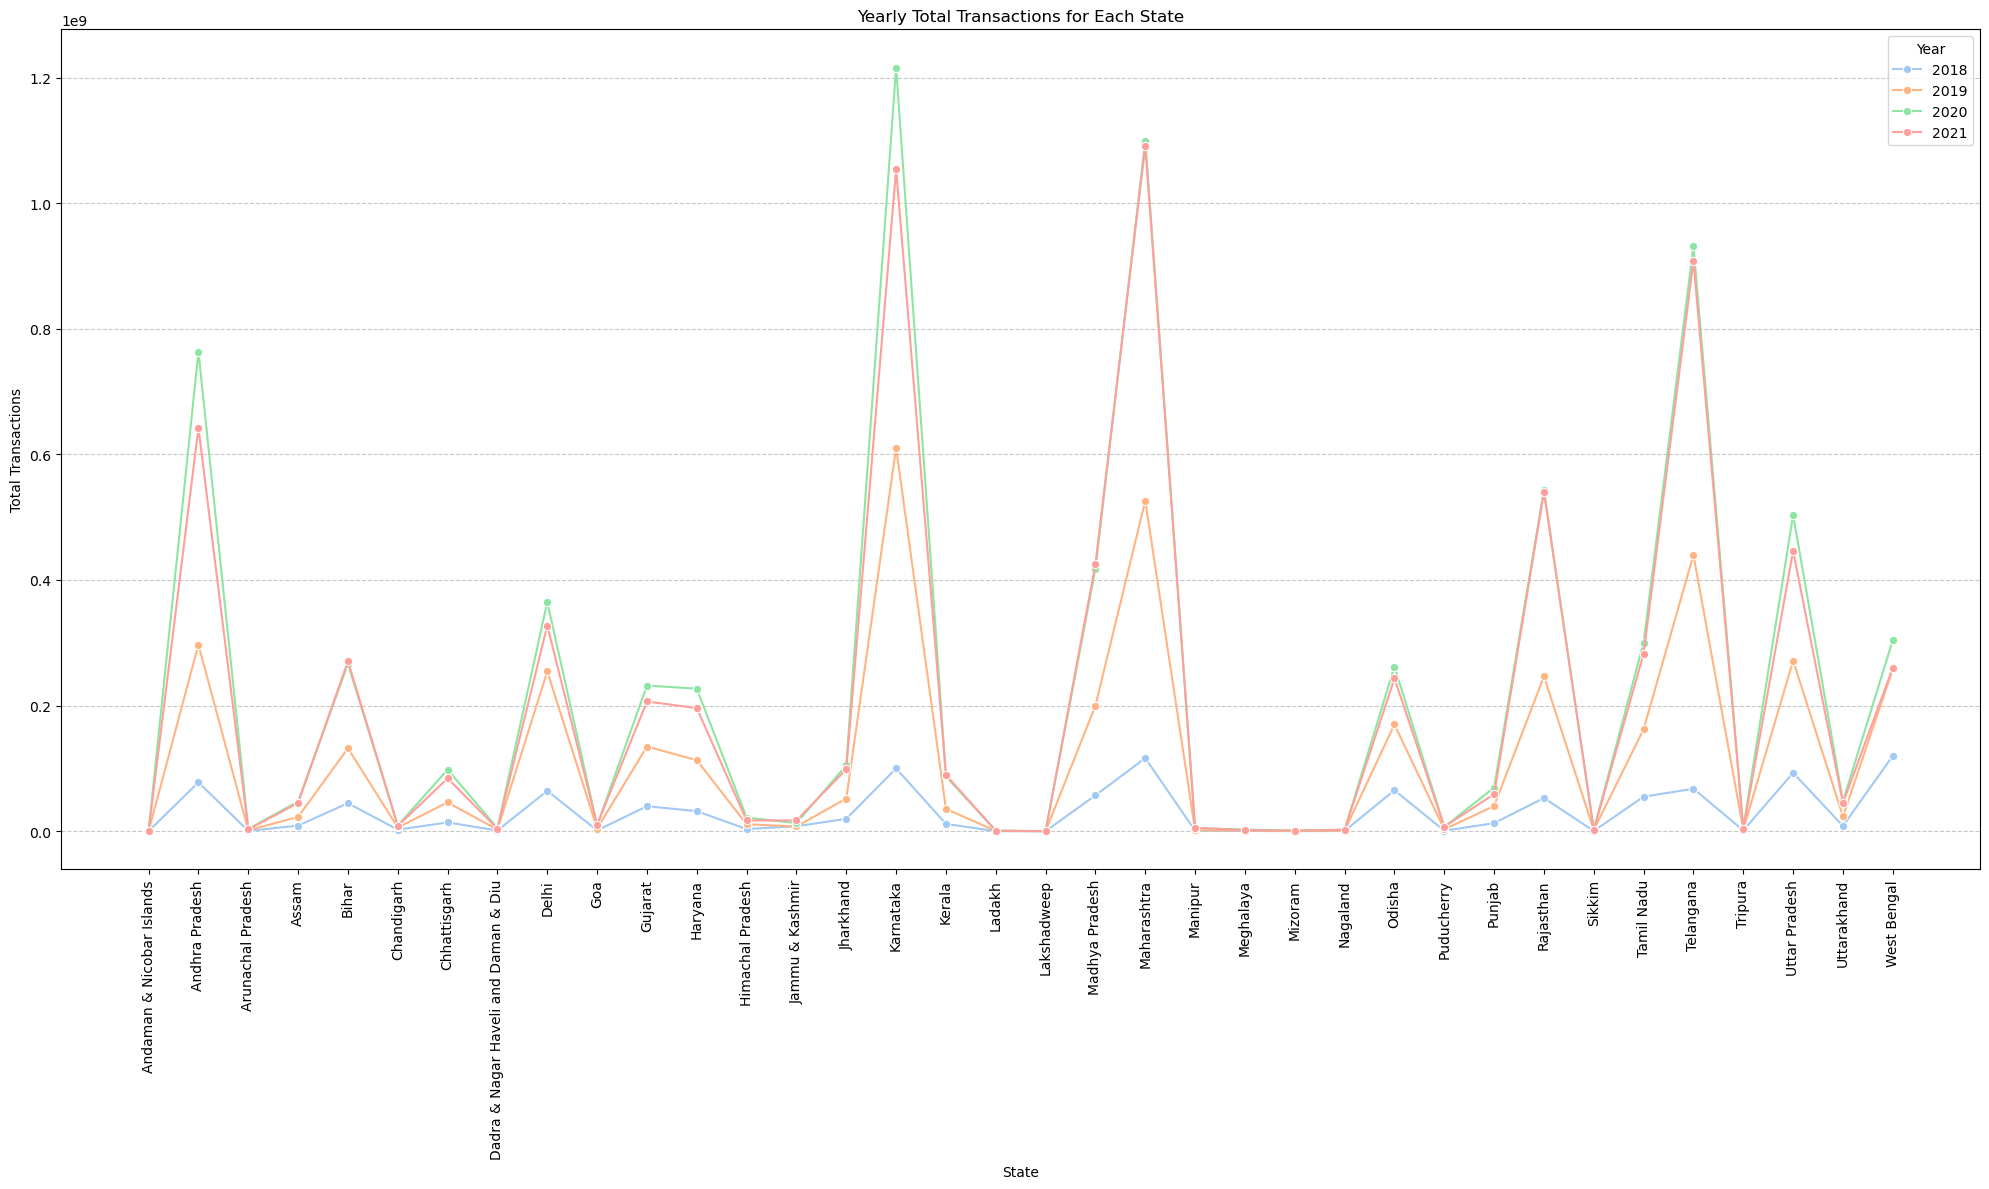

In [44]:
# Creating the line plot using seaborn
plt.figure(figsize=(20, 12))
sns.lineplot(x='State', y='Transactions', hue='Year', data=grouped_data, marker='o', palette='pastel')

# Adding titles and labels
plt.title('Yearly Total Transactions for Each State')
plt.xlabel('State')
plt.ylabel('Total Transactions')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()

In [45]:
# # findings:
# 1.as the year increases the transaction increases for all the state.
# 2.in 2020 karnataka has heighest total transaction volume
# 3.for maharashtra transaction volume is nearly constant for year 2020 & 2021
# 4.manipur,meghalaya,mizorom and nagaland has the the lowest and constant transaction,for all years
# 5.we can see from the graph their is huge increase of transaction after 2019 for all state,mostly because of pandemic.

In [46]:
#yearly ATV per user for all the state

# Grouping and reshaping the data
grouped_data2 = state_txn_users.groupby(['State', 'Year'])['ATV (INR)'].sum().reset_index()
grouped_data2.head(15)


,State,Year,ATV (INR)
0,Andaman & Nicobar Islands,2018,11923.66
1,Andaman & Nicobar Islands,2019,14195.08
2,Andaman & Nicobar Islands,2020,12275.35
3,Andaman & Nicobar Islands,2021,5835.64
4,Andhra Pradesh,2018,6246.69
5,Andhra Pradesh,2019,7179.27
6,Andhra Pradesh,2020,8635.71
7,Andhra Pradesh,2021,4732.40
8,Arunachal Pradesh,2018,9838.80
9,Arunachal Pradesh,2019,10658.95


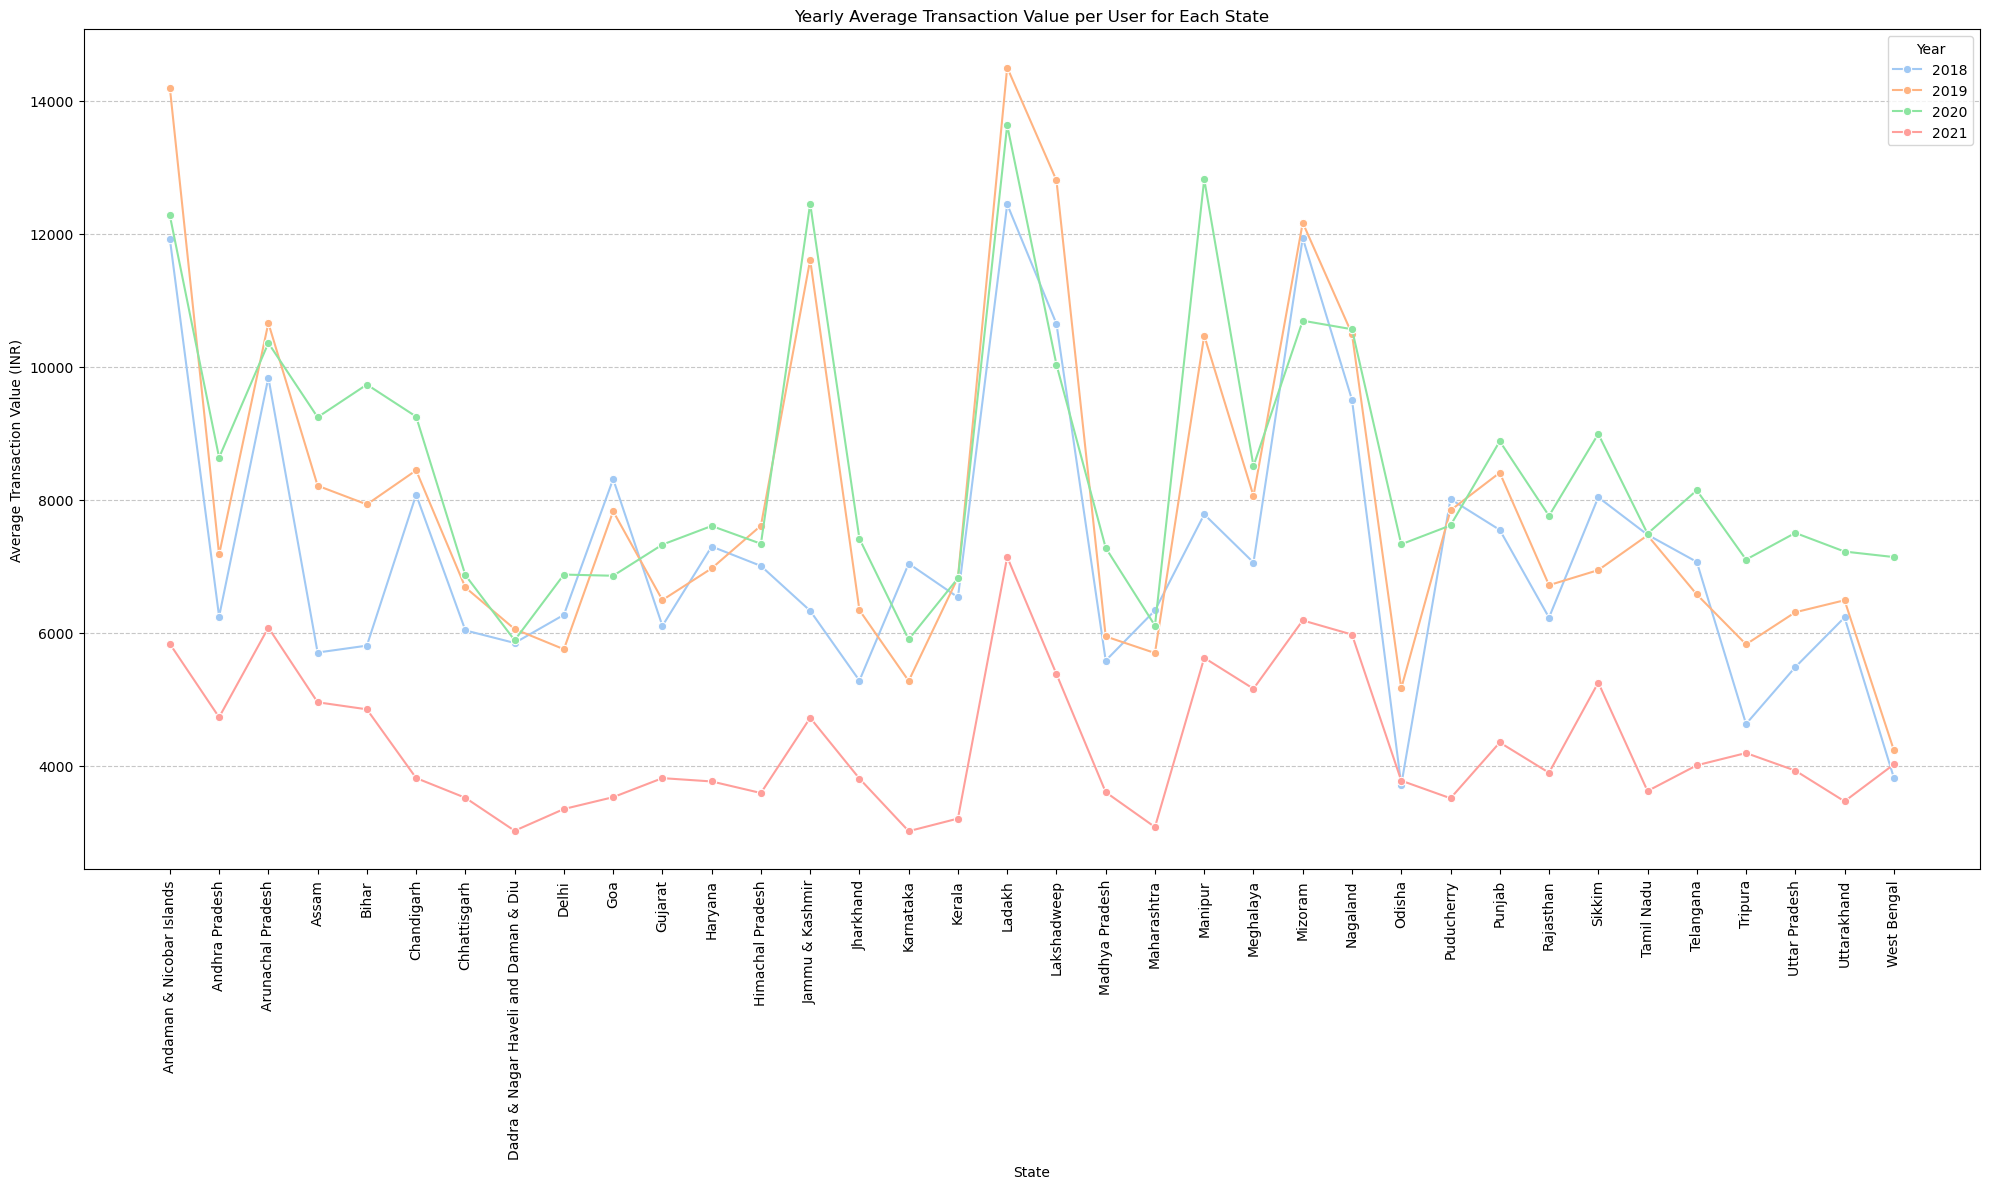

In [47]:
# Create a line plot using seaborn
plt.figure(figsize=(20, 12))
sns.lineplot(x='State', y='ATV (INR)', hue='Year', data=grouped_data2, marker='o', palette='pastel')

# Adding titles and labels
plt.title('Yearly Average Transaction Value per User for Each State')
plt.xlabel('State')
plt.ylabel('Average Transaction Value (INR)')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()

In [48]:
# # findings:
# the yearly atv trend increases increases overtime and then it decreases in 2021 for majority of the state.
# we can see in the year 2021 the average transaction value per user has decreased from all the state.
# in 2019 the atv per user from ladakh and andaman is the heighest.
# in 2019 andhra pradesh has the lowest atv per user

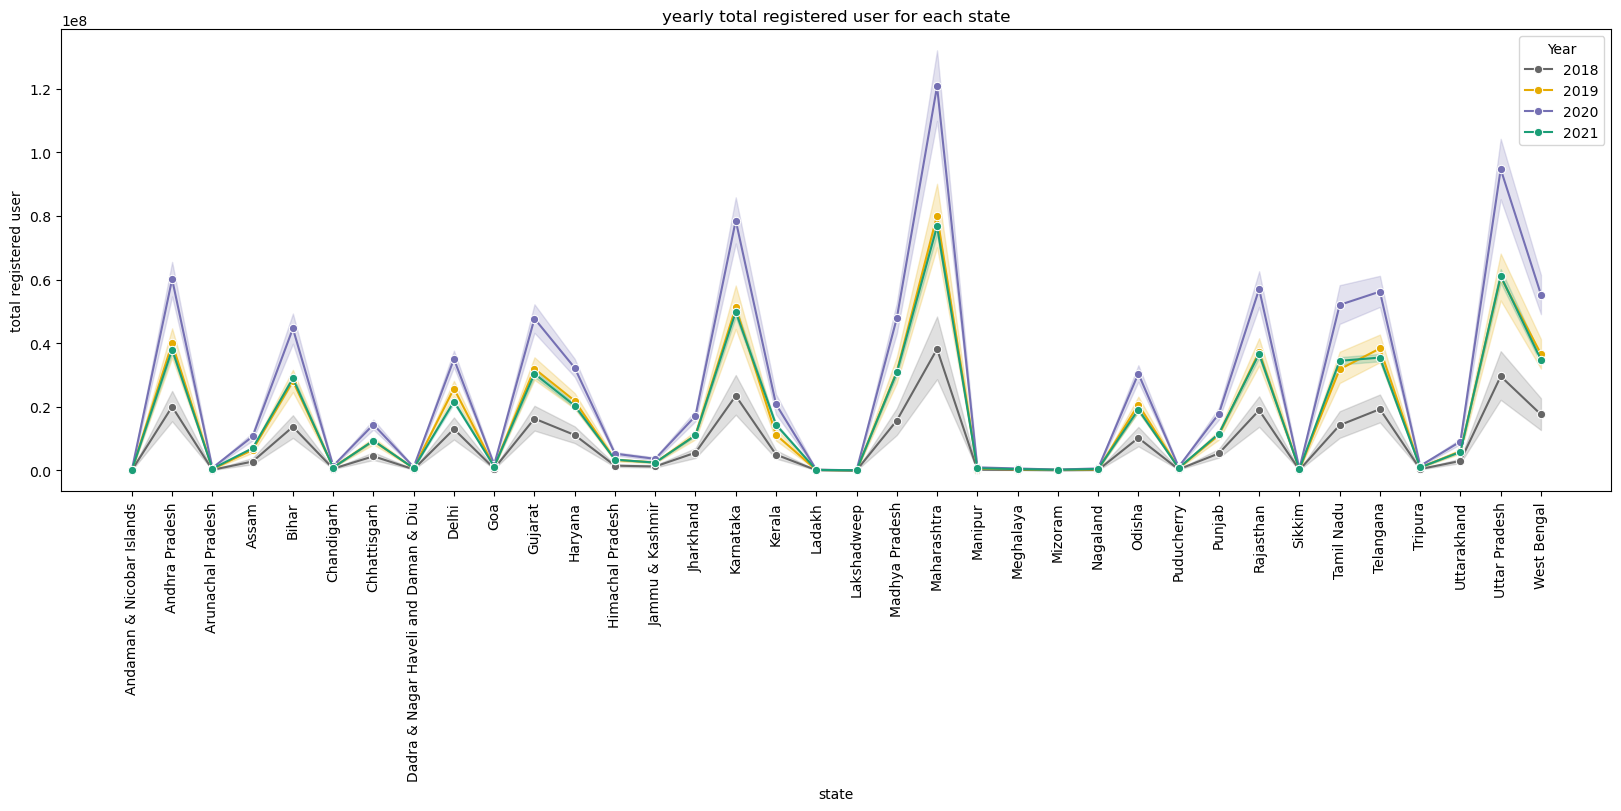

In [49]:
# Yearly trend of registered user for all state.

plt.figure(figsize=(20,6))
sns.lineplot(x='State',y='Registered Users',data=state_txn_users,hue='Year',palette='Dark2_r',marker='o',estimator=sum)
plt.xlabel('state')
plt.ylabel('total registered user')
plt.xticks(rotation=90)
plt.title('yearly total registered user for each state')
plt.show()

In [50]:
# # findings:
# the trend of registered user increases every year for all state,except for north-east states.
# in maharashtra total registered users is the heighest compared to other state.
# up is in the 2nd heighest position of registered user. 

In [51]:
# identifying top 10 districts with heighest no of transactions over time

top_10=district_txn_users.groupby('District')['Transactions'].sum().sort_values(ascending=False)[0:10].index

districts=district_txn_users.loc[district_txn_users['District'].isin(top_10)]

top_district=districts.pivot_table(index='District',
                     columns=['Year','Quarter'],
                     values='Transactions',
                     aggfunc='sum')

top_district


Year                   2018                                    2019            \
Quarter                   1         2         3         4         1         2   
District                                                                        
Bengaluru Urban     8306513  11916035  18405424  33061353  65174133  89148659   
Bhopal              1704495   2101870   3157810   4226983   8252290  12031142   
Central             2997714   3589206   8165361   9373395  12885975   8821530   
Hyderabad           2545507   3156805   5786941   9360515  24838664  43511186   
Jaipur              2417174   3175255   4954443   7271209  19178441  27449382   
Khordha             1013916   1344202   5333443   4036038   9928652  13339889   
Medchal Malkajgiri  1131530   1459884   2684484   4598129  10127087  11891107   
Pune                3842929   5162876   7890491  11075153  23360634  44795652   
Rangareddy          1459174   1939856   3664948   5803319  12952050  16348519   
Visakhapatnam       1256469   1641192   3394576   4791421   9690866  11705738   

Year                                           2020                        \
Quarter                     3          4          1          2          3   
District                                                                    
Bengaluru Urban     131234422  180458808  200174352  132120979  188947684   
Bhopal               15339970   18062429   18872294   14074026   29560361   
Central              10383905   13130548   24757650   17641823   32203761   
Hyderabad            55159072   72987282   94177232   56374644   99285803   
Jaipur               36334520   44335592   52623661   43871862   71797182   
Khordha              18364742   27477393   23152370   16842715   23387123   
Medchal Malkajgiri   17492750   22999944   25458101   17860704   28698311   
Pune                 67093416   91666565  107497963   58840981  101472134   
Rangareddy           23655175   31237803   31802492   18068048   29573243   
Visakhapatnam        16694947   23594874   27115031   25300401   34421299   

Year                                2021             
Quarter                     4          1          2  
District                                             
Bengaluru Urban     267720411  348712787  326804307  
Bhopal               38492334   67309234   74643630  
Central              32194168   54173342   62131856  
Hyderabad           117008707  169703372  212326623  
Jaipur               82378485  125917532  137247139  
Khordha              30354832   45765876   51729539  
Medchal Malkajgiri   49900746   54854446   58755991  
Pune                142350762  208930588  218732925  
Rangareddy           53405219   60675056   63155281  
Visakhapatnam        46551467   48248923   54390299

Text(0.5, 1.0, 'top 10 districts with heighest no of transactions over time')

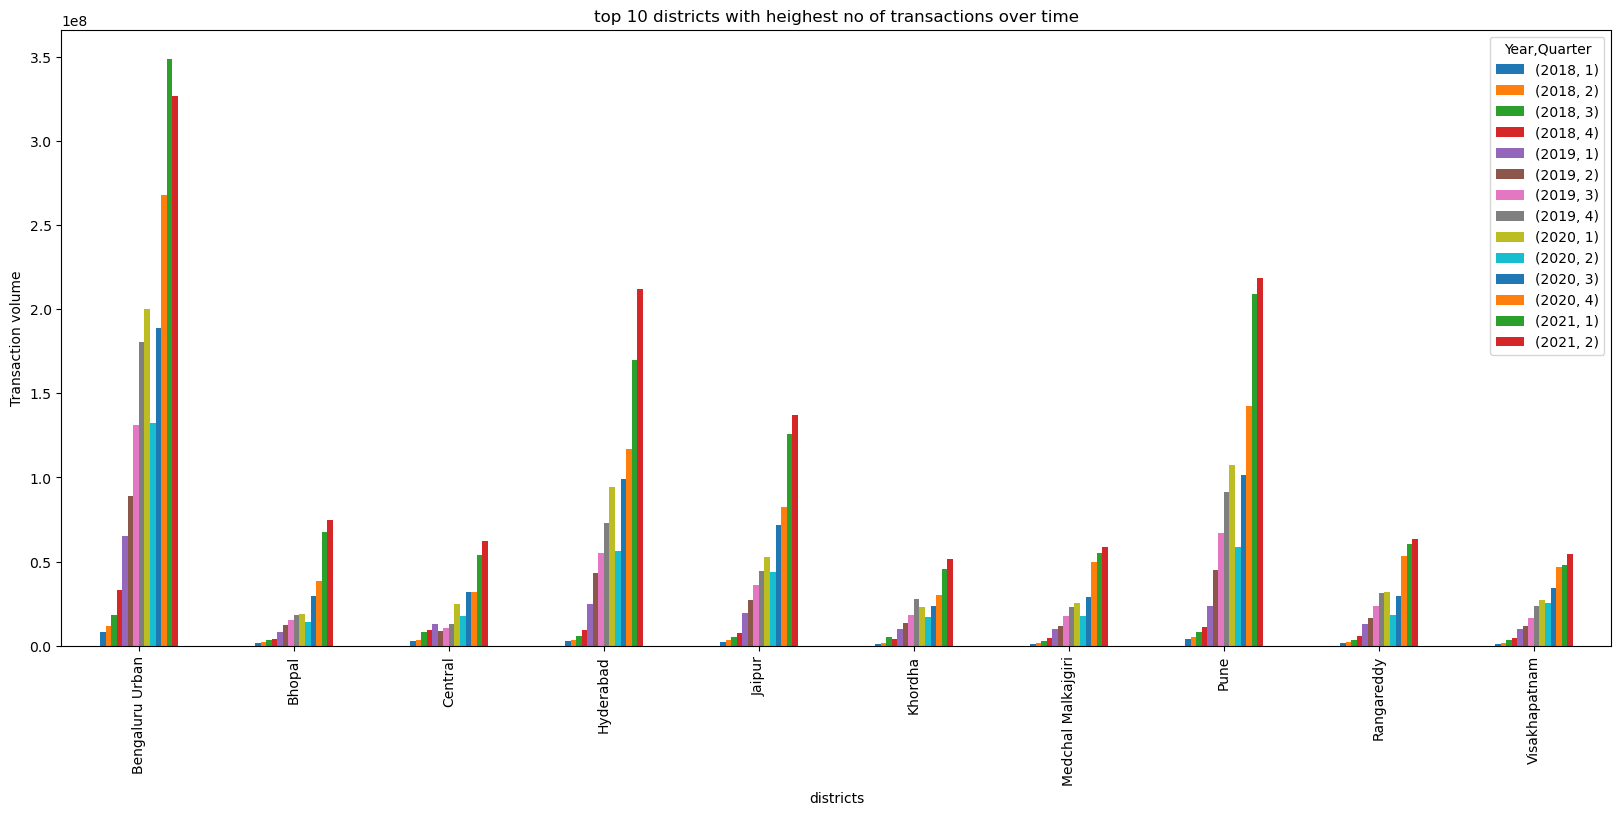

In [52]:
# top_district
top_district.plot.bar(figsize=(20,8))
plt.xlabel('districts')
plt.ylabel('Transaction volume')
plt.title('top 10 districts with heighest no of transactions over time')

In [53]:
# # findings:
# 1.in benguluru-urban transactions in the year 2021,1rd quarter,is the heighest,from all the other districts.
# 2.we can clearly see from the bar graph the transaction trends is increasing for all the districts but then their is a sudden decreases in the
# year 2020,2 quarter. for all the districts.
# 3.benguluru-urban,hyderabad,jaipur and pune, these are the top 4 districts where transaction are the heighest in year 2021,2 quarter. 

In [54]:
# 6.2: Correlate demographic data with transaction data

# Merging state_txn_users with district_demographics
merge=state_txn_users.merge(district_demographics[['State','District','Population','Area (sq km)','Density']],on='State')
merge.head()


,State,Year,Quarter,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens,District,Population,Area (sq km),Density
0,Andaman & Nicobar Islands,2018,1,6658,14631761.22,2197.62,6740,0,Nicobar,36842,1841.00,20
1,Andaman & Nicobar Islands,2018,1,6658,14631761.22,2197.62,6740,0,North and Middle Andaman,105597,3736.00,28
2,Andaman & Nicobar Islands,2018,1,6658,14631761.22,2197.62,6740,0,South Andaman,238142,2672.00,89
3,Andaman & Nicobar Islands,2018,2,11340,28338535.51,2498.99,9405,0,Nicobar,36842,1841.00,20
4,Andaman & Nicobar Islands,2018,2,11340,28338535.51,2498.99,9405,0,North and Middle Andaman,105597,3736.00,28


In [55]:
# 1. Find correlations between demographic data (e.g., population density) and transaction data (e.g., transaction volume). Summarize your findings.
# [Hint: you can use corr()]

matrix=merge[['Density','Transactions','Amount (INR)','ATV (INR)','Registered Users','Population','Area (sq km)']].corr()
matrix.round(2)


,Density,Transactions,Amount (INR),ATV (INR),Registered Users,Population,Area (sq km)
Density,1.00,0.04,0.04,-0.08,0.06,0.22,-0.17
Transactions,0.04,1.00,0.98,-0.11,0.83,0.24,0.19
Amount (INR),0.04,0.98,1.00,-0.04,0.82,0.24,0.18
ATV (INR),-0.08,-0.11,-0.04,1.00,-0.18,-0.30,-0.11
Registered Users,0.06,0.83,0.82,-0.18,1.00,0.43,0.21
Population,0.22,0.24,0.24,-0.30,0.43,1.00,0.25
Area (sq km),-0.17,0.19,0.18,-0.11,0.21,0.25,1.00


<Axes: >

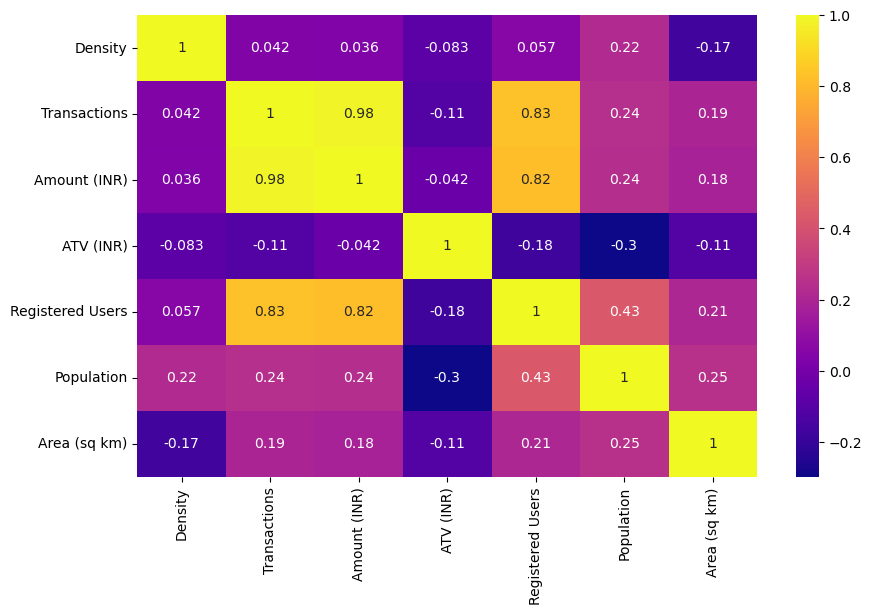

In [56]:
plt.figure(figsize=(10,6))
sns.heatmap(matrix,annot=True,cmap='plasma')

In [57]:
# 6.3: Summarize findings and insights

# 1. Summarize the key findings and insights from your analysis. Provide actionable recommendations based on the data.
# [Hint: type and print your recommendations and findings in the notebook. This is open ended]

# findings:
# there is no corelation between population density and transaction volume from(state_txn and district demo)